In [244]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats, integrate
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None 


In [245]:

# read from csv file into dataframe and create duplicate dataframe
initial_mega_df = pd.read_csv('lotto.csv', index_col = False, )
mega_df = initial_mega_df[:]

In [246]:

# pull date into variable for formatting
date_ = mega_df.date

# format date column into date formal
date_col = list(map(lambda x: x.split(','), date_))
date_col1 = [str(x).split(',') for x in date_col]
date_list = list(map(lambda x: (x[1].strip(" ").strip("'").strip(" ") + x[2].strip(" ").strip("'").strip("']")), date_col1))
date_formatted = list(map(lambda x: datetime.datetime.strptime(x,"%B %d %Y").strftime('%m/%d/%Y'), date_list))

In [247]:

# add new date column to dataframe
date_formatted = pd.Series(date_formatted)
date_formatted = pd.to_datetime(date_formatted)
mega_df.insert(loc=0, column='date_prop', value = date_formatted)

# Add year, month and mean columns in mega_df
year = mega_df['date_prop'].dt.year
month = mega_df['date_prop'].dt.month

mega_df.insert(loc=1, column='year', value = year)
mega_df.insert(loc=2, column='month', value = month)

In [248]:

# pull jackpot into variable for formatting
jackpot_ = mega_df.jackpot
jackpot_col = list(map(lambda x: x.strip('$').strip('Million').strip(' '), jackpot_))

# add new jackpot column to dataframe
jackpot_formatted = pd.Series(jackpot_col)
jackpot_formatted = pd.to_numeric(jackpot_formatted)
mega_df.insert(loc=1, column='jackpot_prop', value = jackpot_formatted)

In [249]:

# Format winning_nums variable 
winning_nums_ = mega_df.winning_nums
winning_nums_col = list(map(lambda x: x.split(' · '), winning_nums_))
winning_nums_col_1 = [int(x[0]) for x in winning_nums_col]
winning_nums_col_2 = [int(x[1]) for x in winning_nums_col]
winning_nums_col_3 = [int(x[2]) for x in winning_nums_col]
winning_nums_col_4 = [int(x[3]) for x in winning_nums_col]
winning_nums_col_5 = [int(x[4]) for x in winning_nums_col]
winning_nums_list = [pd.to_numeric(x) for x in winning_nums_col]

# Add winning_nums as new columns in DataFrame
winning_nums_col_1_formatted = pd.Series(winning_nums_col_1)
winning_nums_col_2_formatted = pd.Series(winning_nums_col_2)
winning_nums_col_3_formatted = pd.Series(winning_nums_col_3)
winning_nums_col_4_formatted = pd.Series(winning_nums_col_4)
winning_nums_col_5_formatted = pd.Series(winning_nums_col_5)
winning_nums_list_formatted = pd.Series(winning_nums_list)
mega_df.insert(loc=2, column='num1_prop', value = winning_nums_col_1_formatted)
mega_df.insert(loc=3, column='num2_prop', value = winning_nums_col_2_formatted)
mega_df.insert(loc=4, column='num3_prop', value = winning_nums_col_3_formatted)
mega_df.insert(loc=5, column='num4_prop', value = winning_nums_col_4_formatted)
mega_df.insert(loc=6, column='num5_prop', value = winning_nums_col_5_formatted)
mega_df.insert(loc=7, column='num_list_prop', value = winning_nums_list_formatted)

In [250]:

# Sorting by date and assigning date as the DataFrame index
mega_df.sort_values(by='date_prop', inplace=True)
mega_df.set_index('date_prop')

,jackpot_prop,num1_prop,num2_prop,num3_prop,num4_prop,num5_prop,num_list_prop,year,month,date,jackpot,mega_ball,multiplier,winning_nums
date_prop,,,,,,,,,,,,,,
1996-09-06,5,5,11,29,47,50,"[5, 11, 29, 47, 50]",1996,9,"Friday, September 6, 1996",$5 Million,17,NaN,05 · 11 · 29 · 47 · 50
1996-09-13,5,3,4,9,30,47,"[3, 4, 9, 30, 47]",1996,9,"Friday, September 13, 1996",$5 Million,1,NaN,03 · 04 · 09 · 30 · 47
1996-09-20,10,5,24,31,34,48,"[5, 24, 31, 34, 48]",1996,9,"Friday, September 20, 1996",$10 Million,6,NaN,05 · 24 · 31 · 34 · 48
1996-09-27,15,8,25,35,37,48,"[8, 25, 35, 37, 48]",1996,9,"Friday, September 27, 1996",$15 Million,8,NaN,08 · 25 · 35 · 37 · 48
1996-10-04,20,8,16,18,36,38,"[8, 16, 18, 36, 38]",1996,10,"Friday, October 4, 1996",$20 Million,1,NaN,08 · 16 · 18 · 36 · 38
1996-10-11,26,2,23,37,40,50,"[2, 23, 37, 40, 50]",1996,10,"Friday, October 11, 1996",$26 Million,22,NaN,02 · 23 · 37 · 40 · 50
1996-10-18,31,9,18,24,26,46,"[9, 18, 24, 26, 46]",1996,10,"Friday, October 18, 1996",$31 Million,18,NaN,09 · 18 · 24 · 26 · 46
1996-10-25,36,23,28,30,35,43,"[23, 28, 30, 35, 43]",1996,10,"Friday, October 25, 1996",$36 Million,9,NaN,23 · 28 · 30 · 35 · 43
1996-11-01,5,2,10,28,39,49,"[2, 10, 28, 39, 49]",1996,11,"Friday, November 1, 1996",$5 Million,17,NaN,02 · 10 · 28 · 39 · 49


In [251]:

# break dataframe into 3 times periods based on lotto number changes - Total mega_df = 2188 rows
mega1_df = mega_df.loc[mega_df['date_prop'] < "10/19/2013"] #1713 drawings
mega2_df = mega_df.loc[(mega_df.date_prop >= "10/19/2013") & (mega_df.date_prop <= "10/27/2017")] #420 drawings
mega3_df = mega_df.loc[mega_df.date_prop > "10/27/2017"]  #55 drawings

In [316]:

# Add Mean columns in mega_df
mean = [np.mean(x) for x in mega_df.num_list_prop]
mega_df.insert(loc=7, column='num_mean', value = mean)

In [252]:

# Add year, month and mean columns in mega1_df
#year = mega1_df['date_prop'].dt.year
#month = mega1_df['date_prop'].dt.month
mean1 = [np.mean(x) for x in mega1_df.num_list_prop]
exp_mean1 = np.ones(len(mega1_df.date_prop)) * (28.5)

mega1_df.insert(loc=7, column='num_mean', value = mean1)
mega1_df.insert(loc=8, column='exp_mean', value = exp_mean1)
#mega1_df.insert(loc=9, column='year', value = year)
#mega1_df.insert(loc=10, column='month', value = month)

In [253]:

# Add year, month and mean columns in mega2_df
#year = mega2_df['date_prop'].dt.year
#month = mega2_df['date_prop'].dt.month
mean2 = [np.mean(x) for x in mega2_df.num_list_prop]
exp_mean2 = np.ones(len(mega2_df.date_prop)) * (38)

mega2_df.insert(loc=7, column='num_mean', value = mean2)
mega2_df.insert(loc=8, column='exp_mean', value = exp_mean2)
#mega2_df.insert(loc=9, column='year', value = year)
#mega2_df.insert(loc=10, column='month', value = month)

In [254]:

# Add year, month and mean columns in mega3_df
#year = mega3_df['date_prop'].dt.year
#month = mega3_df['date_prop'].dt.month
mean3 = [np.mean(x) for x in mega3_df.num_list_prop]
exp_mean3 = np.ones(len(mega3_df.date_prop)) * (35.5)

mega3_df.insert(loc=7, column='num_mean', value = mean3)
mega3_df.insert(loc=8, column='exp_mean', value = exp_mean3)
#mega3_df.insert(loc=9, column='year', value = year)
#mega3_df.insert(loc=10, column='month', value = month)

In [255]:
pd.options.mode.chained_assignment = None 

# Add Above or Below mean column to the DataFrames

mega1_df.loc[mega1_df['num_mean'] > mega1_df['exp_mean'], 'mean_status'] = 'Above'
mega1_df.loc[mega1_df['num_mean'] == mega1_df['exp_mean'], 'mean_status'] = 'Same'
mega1_df.loc[mega1_df['num_mean'] < mega1_df['exp_mean'], 'mean_status'] = 'Below'


mega2_df.loc[mega2_df['num_mean'] > mega2_df['exp_mean'], 'mean_status'] = 'Above'
mega2_df.loc[mega2_df['num_mean'] == mega2_df['exp_mean'], 'mean_status'] = 'Same'
mega2_df.loc[mega2_df['num_mean'] < mega2_df['exp_mean'], 'mean_status'] = 'Below'


mega3_df.loc[mega3_df['num_mean'] > mega3_df['exp_mean'], 'mean_status'] = 'Above'
mega3_df.loc[mega3_df['num_mean'] == mega3_df['exp_mean'], 'mean_status'] = 'Same'
mega3_df.loc[mega3_df['num_mean'] < mega3_df['exp_mean'], 'mean_status'] = 'Below'


In [317]:

pd.options.mode.chained_assignment = None 

# Add Rolling Average to DataFrames

mega_df['num_mean_MA10'] = mega_df.num_mean.rolling(window=10).mean()
mega_df['num_mean_MA25'] = mega_df.num_mean.rolling(window=25).mean()
mega_df['num_mean_MA50'] = mega_df.num_mean.rolling(window=50).mean()
mega_df['num_mean_MA100'] = mega_df.num_mean.rolling(window=100).mean()

mega1_df['num_mean_MA10'] = mega1_df.num_mean.rolling(window=10).mean()
mega1_df['num_mean_MA25'] = mega1_df.num_mean.rolling(window=25).mean()
mega1_df['num_mean_MA50'] = mega1_df.num_mean.rolling(window=50).mean()
mega1_df['num_mean_MA100'] = mega1_df.num_mean.rolling(window=100).mean()


mega2_df['num_mean_MA10'] = mega2_df.num_mean.rolling(window=10).mean()
mega2_df['num_mean_MA25'] = mega2_df.num_mean.rolling(window=25).mean()
mega2_df['num_mean_MA50'] = mega2_df.num_mean.rolling(window=50).mean()
mega2_df['num_mean_MA100'] = mega2_df.num_mean.rolling(window=100).mean()

mega3_df['num_mean_MA10'] = mega3_df.num_mean.rolling(window=10).mean()
mega3_df['num_mean_MA25'] = mega3_df.num_mean.rolling(window=25).mean()
mega3_df['num_mean_MA50'] = mega3_df.num_mean.rolling(window=50).mean()
mega3_df['num_mean_MA100'] = mega3_df.num_mean.rolling(window=100).mean()

In [257]:
mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)
mega2_df.to_csv("mega_time2", columns=None, header=True, index=False, index_label=None)
mega3_df.to_csv("mega_time3", columns=None, header=True, index=False, index_label=None)

In [258]:
%matplotlib inline

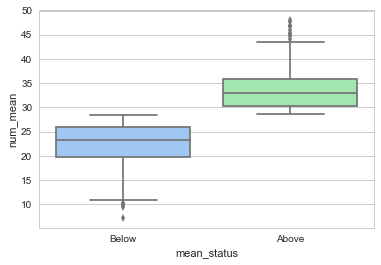

In [259]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.boxplot(x='mean_status', y='num_mean', data=mega1_df, orient='v')


In [285]:
mega1_df

,date_prop,jackpot_prop,num1_prop,num2_prop,num3_prop,num4_prop,num5_prop,num_mean,exp_mean,num_list_prop,...,date,jackpot,mega_ball,multiplier,winning_nums,mean_status,num_mean_MA10,num_mean_MA25,num_mean_MA50,num_mean_MA100
419,1996-09-06,5,5,11,29,47,50,28.4,28.5,"[5, 11, 29, 47, 50]",...,"Friday, September 6, 1996",$5 Million,17,NaN,05 · 11 · 29 · 47 · 50,Below,NaN,NaN,NaN,NaN
418,1996-09-13,5,3,4,9,30,47,18.6,28.5,"[3, 4, 9, 30, 47]",...,"Friday, September 13, 1996",$5 Million,1,NaN,03 · 04 · 09 · 30 · 47,Below,NaN,NaN,NaN,NaN
417,1996-09-20,10,5,24,31,34,48,28.4,28.5,"[5, 24, 31, 34, 48]",...,"Friday, September 20, 1996",$10 Million,6,NaN,05 · 24 · 31 · 34 · 48,Below,NaN,NaN,NaN,NaN
416,1996-09-27,15,8,25,35,37,48,30.6,28.5,"[8, 25, 35, 37, 48]",...,"Friday, September 27, 1996",$15 Million,8,NaN,08 · 25 · 35 · 37 · 48,Above,NaN,NaN,NaN,NaN
445,1996-10-04,20,8,16,18,36,38,23.2,28.5,"[8, 16, 18, 36, 38]",...,"Friday, October 4, 1996",$20 Million,1,NaN,08 · 16 · 18 · 36 · 38,Below,NaN,NaN,NaN,NaN
444,1996-10-11,26,2,23,37,40,50,30.4,28.5,"[2, 23, 37, 40, 50]",...,"Friday, October 11, 1996",$26 Million,22,NaN,02 · 23 · 37 · 40 · 50,Above,NaN,NaN,NaN,NaN
443,1996-10-18,31,9,18,24,26,46,24.6,28.5,"[9, 18, 24, 26, 46]",...,"Friday, October 18, 1996",$31 Million,18,NaN,09 · 18 · 24 · 26 · 46,Below,NaN,NaN,NaN,NaN
442,1996-10-25,36,23,28,30,35,43,31.8,28.5,"[23, 28, 30, 35, 43]",...,"Friday, October 25, 1996",$36 Million,9,NaN,23 · 28 · 30 · 35 · 43,Above,NaN,NaN,NaN,NaN
441,1996-11-01,5,2,10,28,39,49,25.6,28.5,"[2, 10, 28, 39, 49]",...,"Friday, November 1, 1996",$5 Million,17,NaN,02 · 10 · 28 · 39 · 49,Below,NaN,NaN,NaN,NaN
440,1996-11-08,5,11,23,25,35,46,28.0,28.5,"[11, 23, 25, 35, 46]",...,"Friday, November 8, 1996",$5 Million,17,NaN,11 · 23 · 25 · 35 · 46,Below,26.96,NaN,NaN,NaN


Text(0,0.5,'Mega Ball Winning Number')

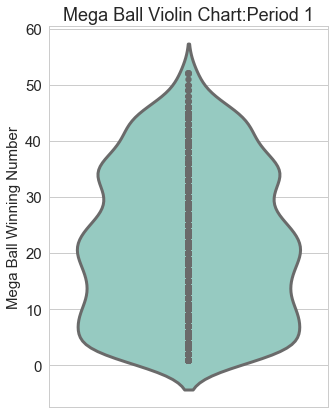

In [424]:

fig, ax = plt.subplots(figsize=(5,7))
b = sns.violinplot( y='mega_ball', data = mega1_df, palette="Set3",
                   inner="point", bw =.2, cut=2, linewidth=3) # , orient='v'
plt.title('Mega Ball Violin Chart:Period 1', size=18)
#f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.5, style="whitegrid") # rc={'figure.figsize':(8,6)},

#b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Mega Ball Winning Number",fontsize=15)
#b.tick_params(labelsize=12)





In [412]:
mega1_df[mega1_df.mega_ball > 46]

,date_prop,jackpot_prop,num1_prop,num2_prop,num3_prop,num4_prop,num5_prop,num_mean,exp_mean,num_list_prop,...,date,jackpot,mega_ball,multiplier,winning_nums,mean_status,num_mean_MA10,num_mean_MA25,num_mean_MA50,num_mean_MA100
965,2002-05-31,12,12,28,45,46,52,36.6,28.5,"[12, 28, 45, 46, 52]",...,"Friday, May 31, 2002",$12 Million,47,NaN,12 · 28 · 45 · 46 · 52,Above,27.60,26.272,25.988,25.306
964,2002-06-04,15,3,25,29,30,48,27.0,28.5,"[3, 25, 29, 30, 48]",...,"Tuesday, June 4, 2002",$15 Million,48,NaN,03 · 25 · 29 · 30 · 48,Below,28.58,26.200,25.956,25.330
962,2002-06-11,27,5,6,9,33,44,19.4,28.5,"[5, 6, 9, 33, 44]",...,"Tuesday, June 11, 2002",$27 Million,52,NaN,05 · 06 · 09 · 33 · 44,Below,27.92,26.248,25.836,25.326
958,2002-06-25,60,4,18,21,27,41,22.2,28.5,"[4, 18, 21, 27, 41]",...,"Tuesday, June 25, 2002",$60 Million,50,NaN,04 · 18 · 21 · 27 · 41,Below,25.74,26.168,25.444,25.384
952,2002-07-16,165,10,24,35,49,52,34.0,28.5,"[10, 24, 35, 49, 52]",...,"Tuesday, July 16, 2002",$165 Million,47,NaN,10 · 24 · 35 · 49 · 52,Above,29.12,27.848,26.596,25.638
944,2002-08-13,58,3,10,15,18,25,14.2,28.5,"[3, 10, 15, 18, 25]",...,"Tuesday, August 13, 2002",$58 Million,52,NaN,03 · 10 · 15 · 18 · 25,Below,25.42,26.920,26.384,25.548
972,2002-11-05,79,2,7,16,28,36,17.8,28.5,"[2, 7, 16, 28, 36]",...,"Tuesday, November 5, 2002",$79 Million,47,NaN,02 · 07 · 16 · 28 · 36,Below,28.18,27.024,27.240,26.322
1015,2002-12-06,26,4,8,30,36,52,26.0,28.5,"[4, 8, 30, 36, 52]",...,"Friday, December 6, 2002",$26 Million,48,NaN,04 · 08 · 30 · 36 · 52,Below,27.70,27.960,27.584,26.760
1011,2002-12-20,55,10,14,41,46,49,32.0,28.5,"[10, 14, 41, 46, 49]",...,"Friday, December 20, 2002",$55 Million,52,NaN,10 · 14 · 41 · 46 · 49,Above,24.38,27.304,27.032,26.408
998,2003-02-04,90,5,12,16,22,24,15.8,28.5,"[5, 12, 16, 22, 24]",...,"Tuesday, February 4, 2003",$90 Million,48,NaN,05 · 12 · 16 · 22 · 24,Below,28.52,27.384,27.592,26.988


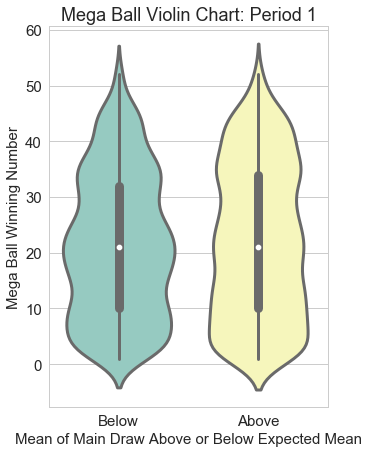

In [425]:

fig, ax = plt.subplots(figsize=(5,7))
b = sns.violinplot(x='mean_status', y='mega_ball', data = mega1_df, palette="Set3",
                   inner="box", bw =.2, cut=2, linewidth=3) # , orient='v'

plt.title('Mega Ball Violin Chart: Period 1', size=18)
b.set_ylabel("Mega Ball Winning Number",fontsize=15)
b.set_xlabel("Mean of Main Draw Above or Below Expected Mean",fontsize=15)
#f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.5, style="whitegrid") # rc={'figure.figsize':(8,6)},




Text(22.2,0.5,'Feed')

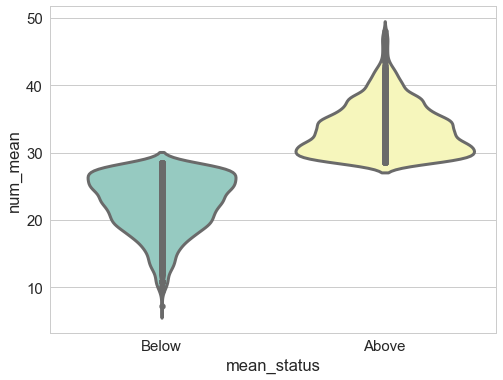

In [289]:


b = sns.violinplot(x='mean_status', y='num_mean', data = mega1_df, palette="Set3",
                   inner="point", bw =.2, cut=2, linewidth=3) # , orient='v'

#f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.5, style="whitegrid") # rc={'figure.figsize':(8,6)},
#b.axes.set_title("Title",fontsize=20)
#b.set_xlabel("X Label",fontsize=15)
#b.set_ylabel("Y Label",fontsize=15)
#b.tick_params(labelsize=12)

# Show each distribution with both violins and points
#sns.violinplot(x="weight",y="feed",data=df, palette="Set3", inner="points", )

#sns.despine(left=True)

#f.suptitle('ABC', fontsize=18, fontweight='bold')
ax.set_xlabel("Weight (g)",size = 16,alpha=0.7)
ax.set_ylabel("Feed",size = 16,alpha=0.7)




In [293]:
mega1_df.dtypes

date_prop         datetime64[ns]
jackpot_prop               int64
num1_prop                  int64
num2_prop                  int64
num3_prop                  int64
num4_prop                  int64
num5_prop                  int64
num_mean                 float64
exp_mean                 float64
num_list_prop             object
year                       int64
month                      int64
date                      object
jackpot                   object
mega_ball                  int64
multiplier               float64
winning_nums              object
mean_status               object
num_mean_MA10            float64
num_mean_MA25            float64
num_mean_MA50            float64
num_mean_MA100           float64
dtype: object

In [314]:
mega_df

,date_prop,jackpot_prop,num1_prop,num2_prop,num3_prop,num4_prop,num5_prop,num_list_prop,year,month,date,jackpot,mega_ball,multiplier,winning_nums
419,1996-09-06,5,5,11,29,47,50,"[5, 11, 29, 47, 50]",1996,9,"Friday, September 6, 1996",$5 Million,17,NaN,05 · 11 · 29 · 47 · 50
418,1996-09-13,5,3,4,9,30,47,"[3, 4, 9, 30, 47]",1996,9,"Friday, September 13, 1996",$5 Million,1,NaN,03 · 04 · 09 · 30 · 47
417,1996-09-20,10,5,24,31,34,48,"[5, 24, 31, 34, 48]",1996,9,"Friday, September 20, 1996",$10 Million,6,NaN,05 · 24 · 31 · 34 · 48
416,1996-09-27,15,8,25,35,37,48,"[8, 25, 35, 37, 48]",1996,9,"Friday, September 27, 1996",$15 Million,8,NaN,08 · 25 · 35 · 37 · 48
445,1996-10-04,20,8,16,18,36,38,"[8, 16, 18, 36, 38]",1996,10,"Friday, October 4, 1996",$20 Million,1,NaN,08 · 16 · 18 · 36 · 38
444,1996-10-11,26,2,23,37,40,50,"[2, 23, 37, 40, 50]",1996,10,"Friday, October 11, 1996",$26 Million,22,NaN,02 · 23 · 37 · 40 · 50
443,1996-10-18,31,9,18,24,26,46,"[9, 18, 24, 26, 46]",1996,10,"Friday, October 18, 1996",$31 Million,18,NaN,09 · 18 · 24 · 26 · 46
442,1996-10-25,36,23,28,30,35,43,"[23, 28, 30, 35, 43]",1996,10,"Friday, October 25, 1996",$36 Million,9,NaN,23 · 28 · 30 · 35 · 43
441,1996-11-01,5,2,10,28,39,49,"[2, 10, 28, 39, 49]",1996,11,"Friday, November 1, 1996",$5 Million,17,NaN,02 · 10 · 28 · 39 · 49
440,1996-11-08,5,11,23,25,35,46,"[11, 23, 25, 35, 46]",1996,11,"Friday, November 8, 1996",$5 Million,17,NaN,11 · 23 · 25 · 35 · 46


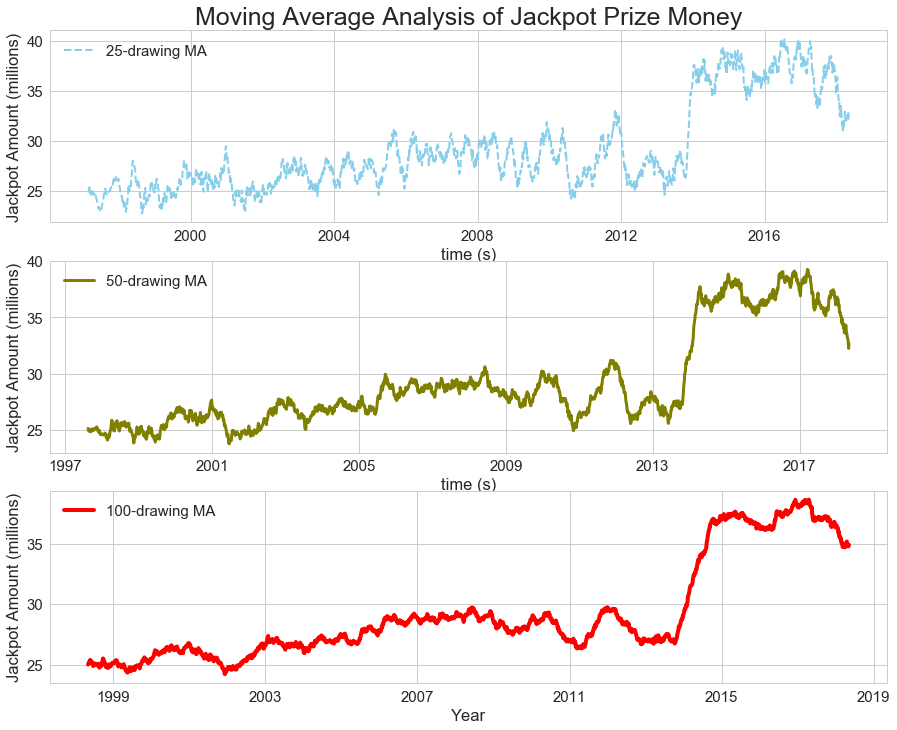

In [329]:

#mega1_df.plot.line(x='date_prop',y='num_mean_MA50',figsize=(12,9))
#mega1_df.plot.line(x='date_prop',y='num_mean_MA50',figsize=(12,9))
plt.figure(figsize=(15,12))

plt.subplot(3, 1, 1)
plt.title('Moving Average Analysis of Jackpot Prize Money', size=25)
plt.plot( 'date_prop', 'num_mean_MA25', data=mega_df, label="25-drawing MA", color='skyblue', linewidth=2, linestyle='dashed')
plt.xlabel('time (s)')
plt.ylabel('Jackpot Amount (millions)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot( 'date_prop', 'num_mean_MA50', data=mega_df, color='olive', linewidth=3, label="50-drawing MA")
plt.xlabel('time (s)')
plt.ylabel('Jackpot Amount (millions)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( 'date_prop', 'num_mean_MA100', data=mega_df, color='red', linewidth=4, label="100-drawing MA")
plt.xlabel('Year')
plt.ylabel('Jackpot Amount (millions)')
plt.legend()

plt.show()


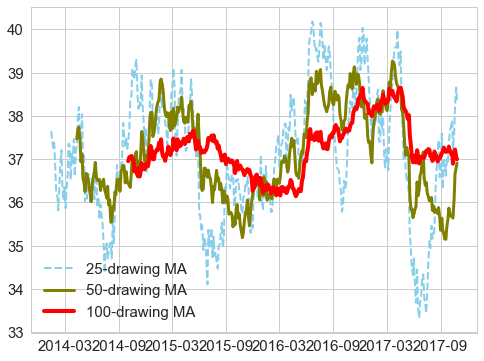

In [304]:



#mega1_df.plot.line(x='date_prop',y='num_mean_MA50',figsize=(12,9))
#mega1_df.plot.line(x='date_prop',y='num_mean_MA50',figsize=(12,9))

plt.plot( 'date_prop', 'num_mean_MA25', data=mega2_df, label="25-drawing MA", color='skyblue', linewidth=2, linestyle='dashed')
plt.plot( 'date_prop', 'num_mean_MA50', data=mega2_df, color='olive', linewidth=3, label="50-drawing MA")
plt.plot( 'date_prop', 'num_mean_MA100', data=mega2_df, color='red', linewidth=4, label="100-drawing MA")
plt.legend()


Text(0.5,1,'Mean Value of Winning Numbers over Time')

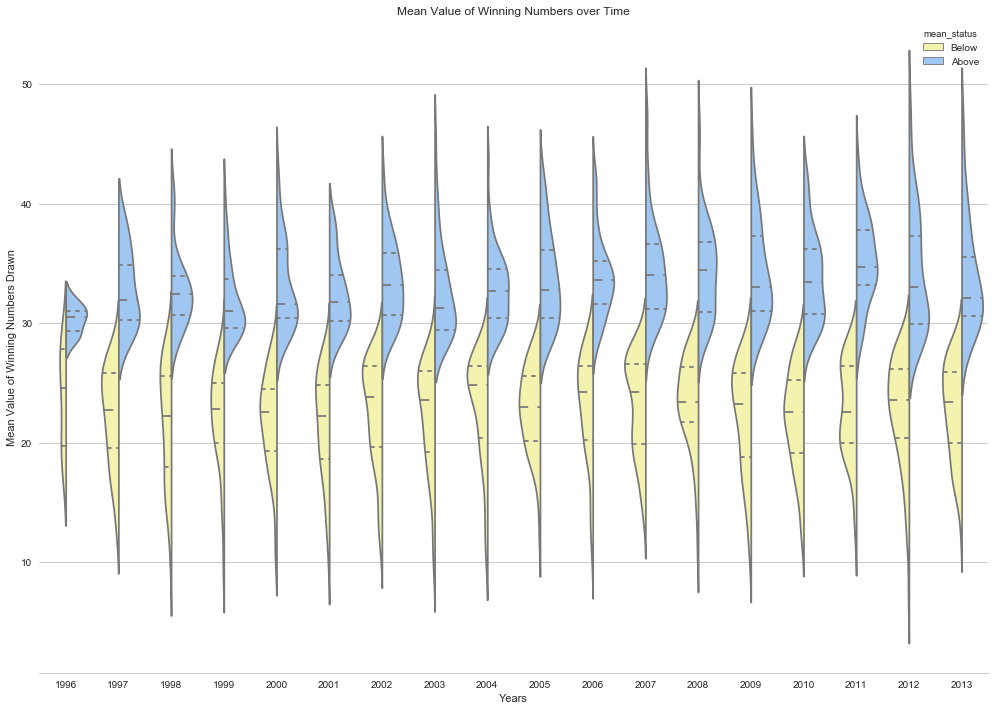

In [261]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
#mega1 = sns.load_dataset("mega1_df")

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots()
sns.violinplot(x="year", y="num_mean", hue="mean_status", data=mega1_df, split=True,
               inner="quart", palette={"Above": "b", "Below": "y"}, ax=ax)
sns.despine(left=True)
fig.set_size_inches(17, 12)
plt.xlabel("Years")
plt.ylabel("Mean Value of Winning Numbers Drawn")
plt.title("Mean Value of Winning Numbers over Time")

In [21]:
initial_mega_detail_df = pd.read_csv('mega_detail.csv', index_col = False, )
mega_detail_df = initial_mega_detail_df[:]

In [23]:

# Format colums of mega_detail_df DataFrame
clist = list(mega_detail_df.columns)
col_list = clist[0:18]
col_list.extend(clist[27:29])
col_list.extend(clist[32:50])

In [25]:

# Removing "$" and "," from number fields
mega_detail_df[col_list] = mega_detail_df[col_list].replace({'\$':''}, regex = True)
mega_detail_df[col_list] = mega_detail_df[col_list].replace({',':''}, regex = True)
mega_detail_df[col_list] = mega_detail_df[col_list].apply(pd.to_numeric)

ValueError: ('Unable to parse string "(5450)" at position 1975', 'occurred at index state_amt4')

In [26]:

# pull date into variable for formatting
date_d = mega_detail_df.detail_date

# format date column into date formal
dcol_d = list(map(lambda x: x.split(','), date_d))
date_col_d = [str(x).split(',') for x in dcol_d]
date_list_d = list(map(lambda x: (x[1].strip(" ").strip("'").strip(" ") + x[2].strip(" ").strip("'").strip("']")), date_col_d))
date_formatted_d = list(map(lambda x: datetime.datetime.strptime(x,"%B %d %Y").strftime('%m/%d/%Y'), date_list_d))

In [27]:

# add new date column to dataframe
date_formatted_d = pd.Series(date_formatted_d)
date_formatted_d = pd.to_datetime(date_formatted_d)
mega_detail_df.insert(loc=0, column='date_prop', value = date_formatted_d)

In [28]:
# Add year and month columns in mega_detail_df
year_d = mega_detail_df['date_prop'].dt.year
month_d = mega_detail_df['date_prop'].dt.month

mega_detail_df.insert(loc=1, column='year', value = year_d)
mega_detail_df.insert(loc=2, column='month', value = month_d)

In [29]:

# Sorting by date and assigning date as the DataFrame index
mega_detail_df.sort_values(by='date_prop', inplace=True)
mega_detail_df.set_index('date_prop', inplace=True)

# Drop NaN values and replace with empty string
mega_detail_df = mega_detail_df.fillna('')

In [30]:
mega_detail_df

,year,month,ca_amt1,ca_amt2,ca_amt3,ca_amt4,ca_amt5,ca_amt6,ca_amt7,ca_amt8,...,state_type3,state_type4,state_type5,state_type6,state_type7,state_type8,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
date_prop,,,,,,,,,,,,,,,,,,,,,
1996-09-06,1996,9,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-09-13,1996,9,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-09-20,1996,9,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-09-27,1996,9,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-10-04,1996,10,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-10-11,1996,10,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-10-18,1996,10,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-10-25,1996,10,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,
1996-11-01,1996,11,,,,,,,,,...,4 + 0,3 + 1,2 + 1,3 + 0,1 + 1,0 + 1,,,,


In [31]:

# Format the Jackpot and Second prize winner columns
mega_detail_df[['j_winner','s_winner']] = mega_detail_df[['j_winner','s_winner']].replace({'from':''}, regex = True)


In [32]:
#mega_detail_df[['j_winner','s_winner','j_num','j_type','j_amt']]

In [33]:

# split jackpot winner
jwinner_ = mega_detail_df.j_winner
jwinner_col = list(map(lambda x: str(x).split(','), jwinner_))


# add new jackpot column to dataframe
#jackpot_formatted = pd.Series(jwinner_col)
#mega_detail_df.insert(loc=5, column='j_winner_prop', value = jackpot_formatted)

# split second jackpot winner
swinner_ = mega_detail_df.s_winner
swinner_col = list(map(lambda x: str(x).split(','), swinner_))

# add new jackpot column to dataframe
#sjackpot_formatted = pd.Series(swinner_col)
#mega_detail_df.insert(loc=5, column='s_winner_prop', value = sjackpot_formatted)

date_col = mega_detail_df.index
j_amt_col = mega_detail_df.j_amt
j_num_col = mega_detail_df.j_num

In [34]:
# winner_df = pd.DataFrame({'jackpot_winner': jwinner_col, 'second winner': swinner_col, 'date':date_col, 'j_amt_col': j_amt_col, 'j_num_col': j_num_col})
# winner_df.to_csv('winner_info1.csv', index=False)

In [35]:

# Create Jackpot winner DataFrame and Remove NAs
initial_winner_detail_df = pd.read_csv('winner_info_prop.csv', index_col = False, )
winner_detail_df= initial_winner_detail_df[:]
winner_detail_df = winner_detail_df.fillna('')

In [36]:

# Change Date to date dtype
winner_detail_df[['date']] = winner_detail_df[['date']].apply(pd.to_datetime)

# Add year and month columns in winner_detail_df
year_j = winner_detail_df['date'].dt.year
month_j = winner_detail_df['date'].dt.month

winner_detail_df.insert(loc=1, column='year', value = year_j)
winner_detail_df.insert(loc=2, column='month', value = month_j)

In [37]:

# Change colums to numeric type 
winner_detail_df[['jnum_1','jnum_2','jnum_3','jnum_4']] = winner_detail_df[['jnum_1','jnum_2','jnum_3','jnum_4']].apply(pd.to_numeric)


In [38]:


# Sorting by date and assigning date as the DataFrame index
winner_detail_df.sort_values(by='date', inplace=True)
winner_detail_df.set_index('date', inplace=True)


In [39]:
winner_detail_df.dtypes

year              float64
month             float64
jackpot_winner     object
jnum_1            float64
jwinner_1          object
jnum_2            float64
jwinner_2          object
jnum_3            float64
jwinner_3          object
jnum_4            float64
jwinner_4          object
j_amt_col          object
j_num_col          object
dtype: object

In [40]:

# Calculate proportion of Jackpot amounts won by Month
jackpot_amt_month = winner_detail_df.groupby(['month'])['j_amt_col'].agg('sum')
total_jackpot_won = sum(jackpot_amt_month)
jackpot_month_prop = jackpot_amt_month/total_jackpot_won

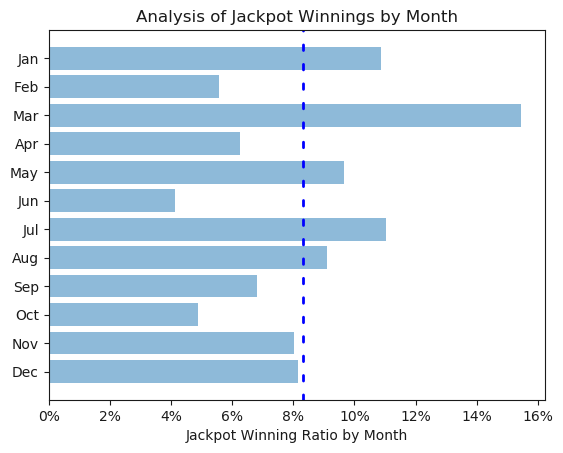

In [41]:

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Plot Jackpot Winning ratio by Month
order = jackpot_month_prop.index
fig, ax = plt.subplots()

plt.barh(order, jackpot_month_prop*100, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month')
plt.title('Analysis of Jackpot Winnings by Month')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_month_prop*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()


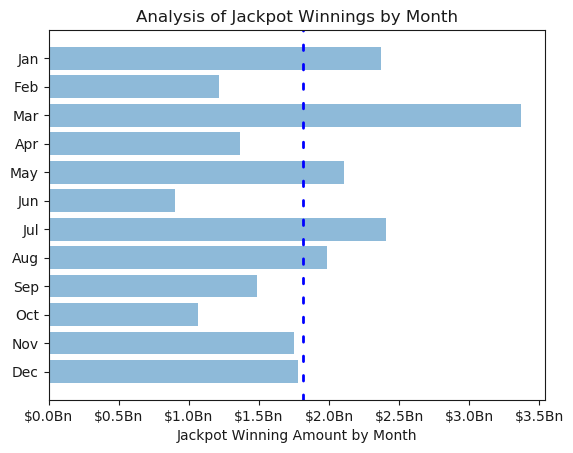

In [42]:


# Plot Jackpot Winnings by Month
order = jackpot_amt_month.index
fig, ax = plt.subplots()
jackpot_amt_month_mean = np.mean(jackpot_amt_month)

plt.barh(order, jackpot_amt_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Amount by Month')
plt.title('Analysis of Jackpot Winnings by Month')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_month_mean, color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [43]:


# Calculate Number of Jackpot wins by Month
jackpot_num_month = winner_detail_df.groupby(['month'])['j_num_col'].agg('sum')


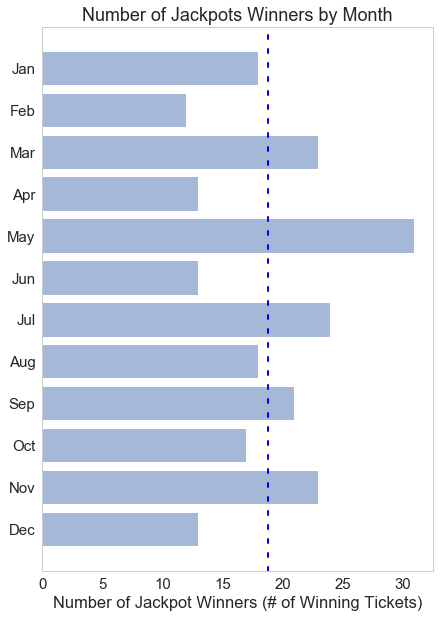

In [340]:


# Plot Number of Jackpot Winners by Month
order = jackpot_num_month.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)

plt.barh(order, jackpot_num_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Number of Jackpot Winners (# of Winning Tickets)')
plt.title('Number of Jackpots Winners by Month')

plt.gca().invert_yaxis()
ax.axvline(jackpot_num_month.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [45]:

# Calculate Count of Jackpot wins by Month
jackpot_count_month = winner_detail_df.groupby(['month'])['jnum_1'].agg('sum')

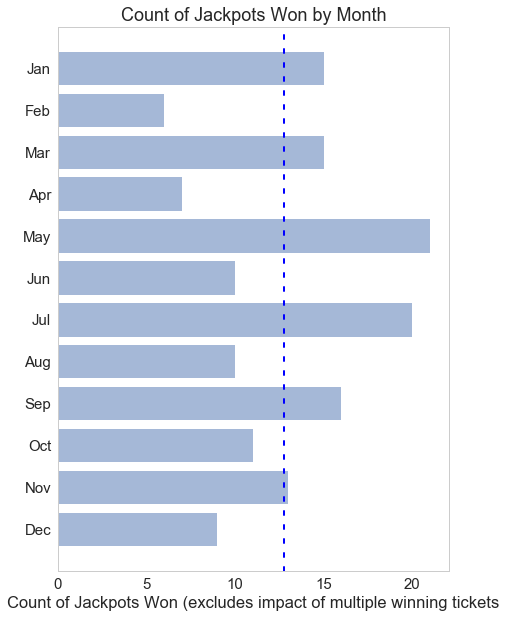

In [339]:


# Plot Count of Jackpot won by Month
order = jackpot_count_month.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)

plt.barh(order, jackpot_count_month, align='center', alpha=0.5)
plt.yticks(order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Count of Jackpots Won (excludes impact of multiple winning tickets')
plt.title('Count of Jackpots Won by Month')
plt.gca().invert_yaxis()
ax.axvline(jackpot_count_month.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [47]:

# Calculate proportion of Jackpot amounts won by Year
jackpot_amt_year = winner_detail_df.groupby(['year'])['j_amt_col'].agg('sum')
total_jackpot_won_year = sum(jackpot_amt_year)
jackpot_year_prop = jackpot_amt_year/total_jackpot_won_year

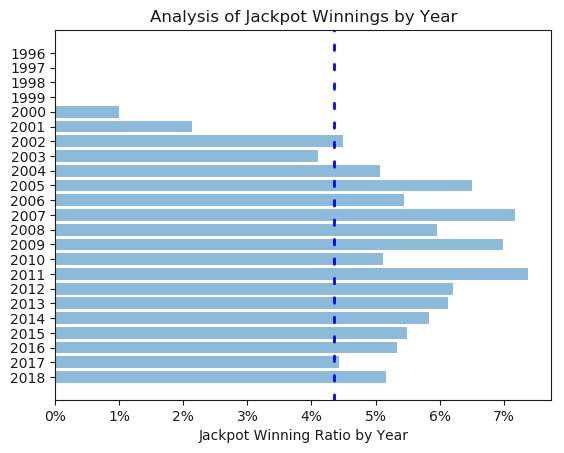

In [48]:

# Plot Jackpot Winning ratio by Year
order = jackpot_year_prop.index
fig, ax = plt.subplots()
years = list(range(1996,2019))

plt.barh(order, jackpot_year_prop*100, align='center', alpha=0.5)
plt.yticks(order, years)
plt.xlabel('Jackpot Winning Ratio by Year')
plt.title('Analysis of Jackpot Winnings by Year')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_year_prop*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

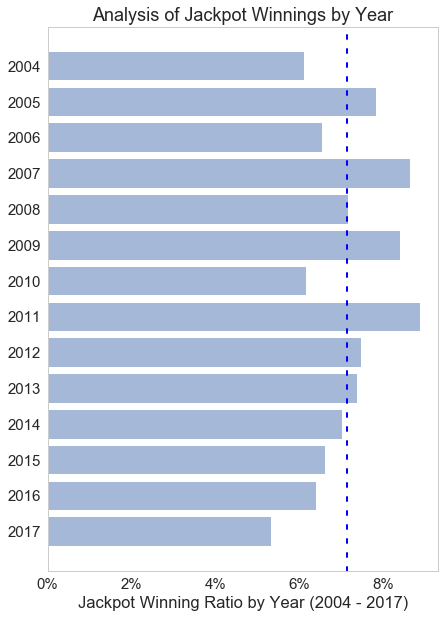

In [341]:

# Plot Jackpot Winning ratio by Year from 2004 to 2017
jackpot_amt_year_since_2004 = jackpot_amt_year[(jackpot_amt_year.index>2003)&(jackpot_amt_year.index<2018)]
total_jackpot_amt_year_since_2004 = sum(jackpot_amt_year_since_2004)
jackpot_year_prop_2004 = jackpot_amt_year_since_2004/total_jackpot_amt_year_since_2004
order = jackpot_year_prop_2004.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)
years = list(range(2004,2018))

plt.barh(order, jackpot_year_prop_2004*100, align='center', alpha=0.5)
plt.yticks(order, years)
plt.xlabel('Jackpot Winning Ratio by Year (2004 - 2017)')
plt.title('Analysis of Jackpot Winnings by Year')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_year_prop_2004*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

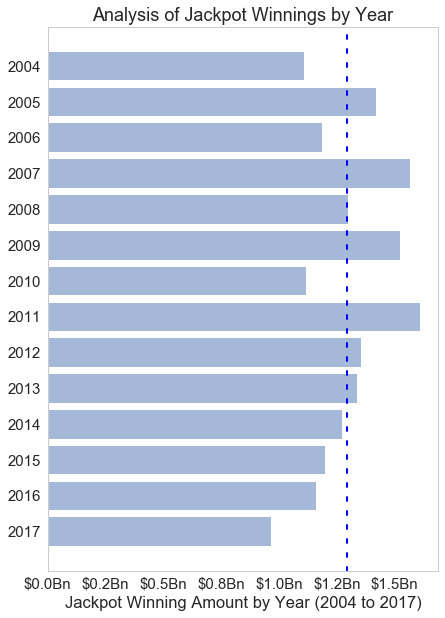

In [344]:


# Filter data
jackpot_amt_year_since_2004 = jackpot_amt_year[(jackpot_amt_year.index>2003)&(jackpot_amt_year.index<2018)]

# Plot Jackpot Winnings by Year from 2010 to present
order_2004 = jackpot_amt_year_since_2004.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)
years_2004 = list(range(2004,2018))

plt.barh(order_2004, jackpot_amt_year_since_2004, align='center', alpha=0.5, )
plt.yticks(order_2004, years_2004)
plt.xlabel('Jackpot Winning Amount by Year (2004 to 2017)')
plt.title('Analysis of Jackpot Winnings by Year')



# Plot Jackpot Winnings by Year
#order = jackpot_amt_year.index
#fig, ax = plt.subplots()
#years = list(range(1996,2019))

#plt.barh(order, jackpot_amt_year, align='center', alpha=0.5)
#plt.yticks(order, years)
#plt.xlabel('Jackpot Winning Amount by Year')
#plt.title('Analysis of Jackpot Winnings by Year')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_year_since_2004.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

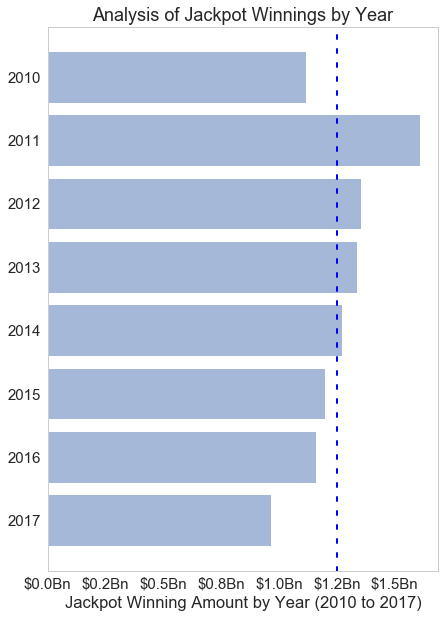

In [343]:

# Filter data
jackpot_amt_year_since_2010 = jackpot_amt_year[(jackpot_amt_year.index>2009)&(jackpot_amt_year.index<2018)]

# Plot Jackpot Winnings by Year from 2010 to present
order_2010 = jackpot_amt_year_since_2010.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)
years_2010 = list(range(2010,2018))

plt.barh(order_2010, jackpot_amt_year_since_2010, align='center', alpha=0.5, )
plt.yticks(order_2010, years_2010)
plt.xlabel('Jackpot Winning Amount by Year (2010 to 2017)')
plt.title('Analysis of Jackpot Winnings by Year')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_year_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

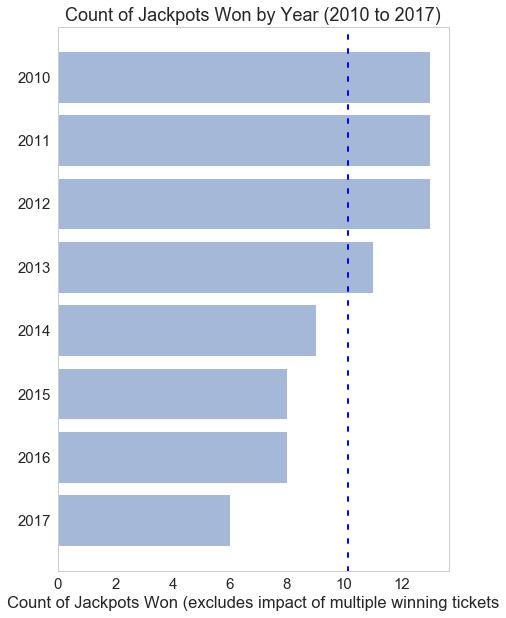

In [342]:

# Calculate Count of Jackpot wins by Month
jackpot_count_year = winner_detail_df.groupby(['year'])['jnum_1'].agg('sum')

# Filter data
jackpot_count_year_since_2010 = jackpot_count_year[(jackpot_count_year.index>2009)&(jackpot_count_year.index<2018)]


# Plot Count of Jackpot won by Year
order_2010 = jackpot_count_year_since_2010.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)
years_2010 = list(range(2010,2018))

plt.barh(order_2010, jackpot_count_year_since_2010, align='center', alpha=0.5)
plt.yticks(order_2010, years_2010)
plt.xlabel('Count of Jackpots Won (excludes impact of multiple winning tickets')
plt.title('Count of Jackpots Won by Year (2010 to 2017)')
plt.gca().invert_yaxis()
ax.axvline(jackpot_count_year_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

In [53]:
#winner_detail_df

In [54]:
mega_df.dtypes

date_prop        datetime64[ns]
jackpot_prop              int64
num1_prop                 int64
num2_prop                 int64
num3_prop                 int64
num4_prop                 int64
num5_prop                 int64
num_list_prop            object
year                      int64
month                     int64
date                     object
jackpot                  object
mega_ball                 int64
multiplier              float64
winning_nums             object
dtype: object

In [367]:
import plotly
plotly.tools.set_credentials_file(username='sanjaypamnani',api_key='frx6kzP5FfnQxTwMPD6M')

Text(0.5,29,'Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')

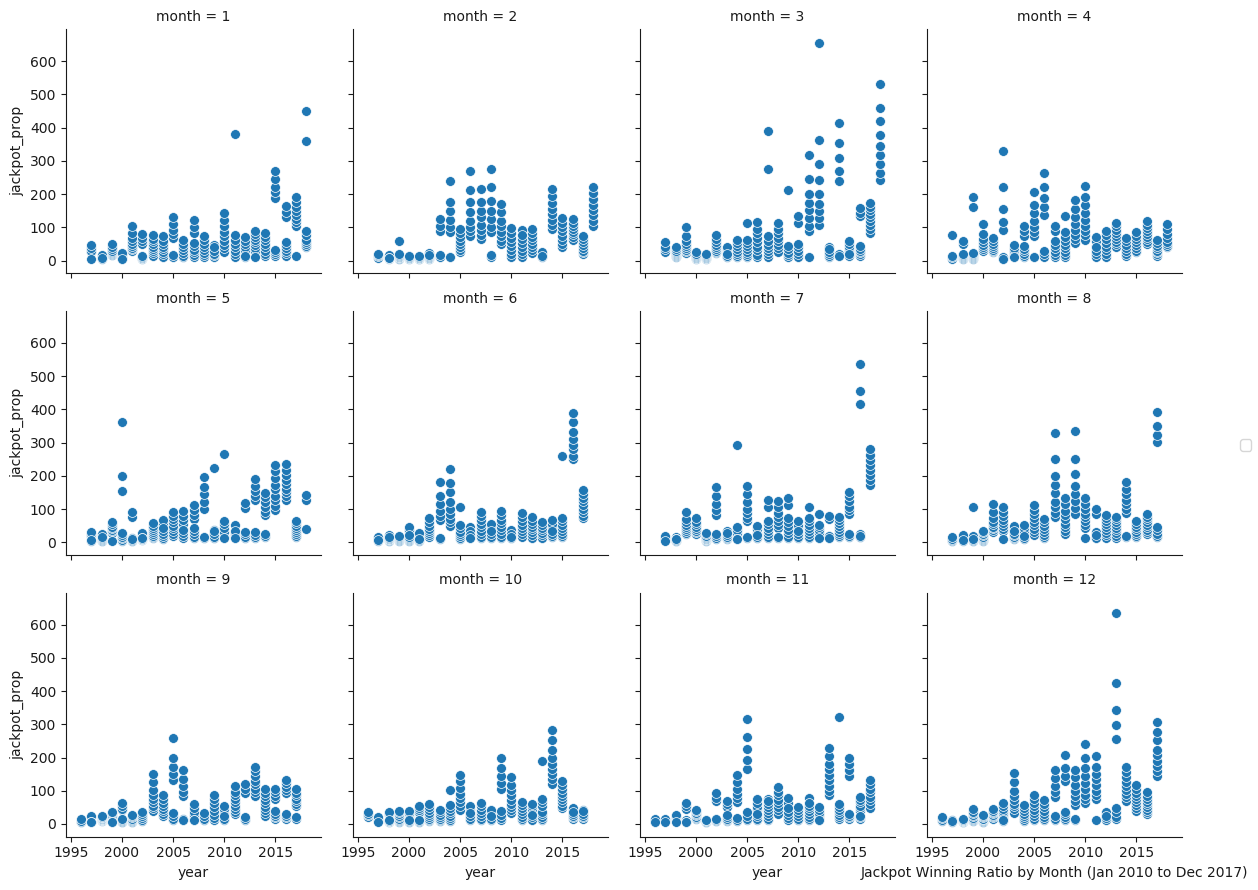

In [56]:

import matplotlib.pyplot as plt
kws = dict(s=50, linewidth=.5)


g = sns.FacetGrid(mega_df, col="month", palette="Set1", col_wrap=4, size=3)
g = g.map(plt.scatter, "year","jackpot_prop", edgecolor="w", **kws).add_legend()
#plt.xticks(p_order, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')
#plt.title('Analysis of Jackpot Winnings by Month Since 2010')

# col="sex", hue="date_prop",

In [57]:
g

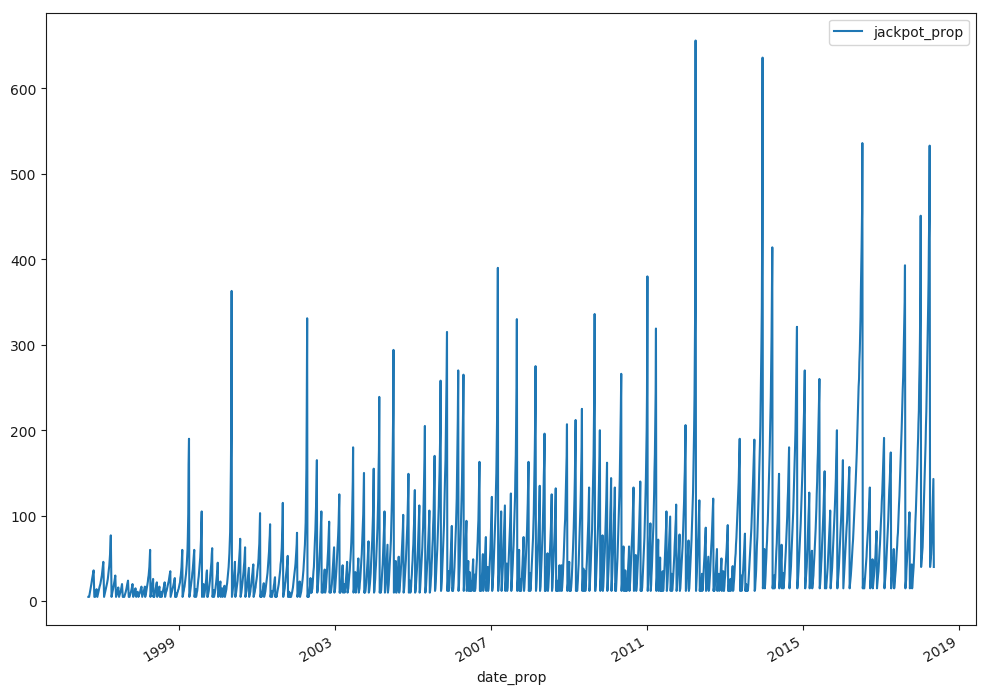

In [58]:
mega_df.plot.line(x='date_prop',y='jackpot_prop',figsize=(12,9))

In [59]:
jackpot_amt_month

month
1.0     2.373000e+09
2.0     1.217000e+09
3.0     3.369000e+09
4.0     1.367000e+09
5.0     2.110000e+09
6.0     9.040000e+08
7.0     2.404000e+09
8.0     1.988000e+09
9.0     1.483000e+09
10.0    1.063000e+09
11.0    1.750000e+09
12.0    1.779000e+09
Name: j_amt_col, dtype: float64

In [60]:
jackpot_amt_month_since_2010 = winner_detail_df[winner_detail_df['year']>2009].groupby(['month'])['j_amt_col'].agg('sum')

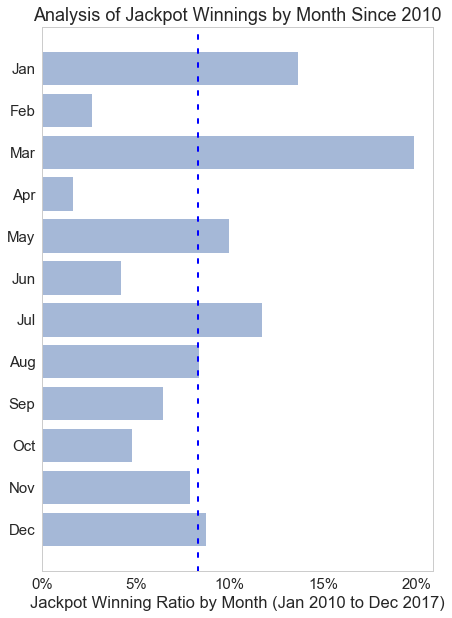

In [337]:


# Calculate proportion of Jackpot amounts won by Month since 2010
jackpot_amt_month_since_2010 = winner_detail_df[(winner_detail_df['year']>2009)&(winner_detail_df['year']<2018)].groupby(['month'])['j_amt_col'].agg('sum')
total_jackpot_won_since_2010 = sum(jackpot_amt_month_since_2010)
jackpot_month_prop_since_2010 = jackpot_amt_month_since_2010/total_jackpot_won_since_2010


# Plot Jackpot Winning ratio by Month Since 2010
order_since_2010 = jackpot_month_prop_since_2010.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)

plt.barh(order_since_2010, jackpot_month_prop_since_2010*100, align='center', alpha=0.5)
plt.yticks(order_since_2010, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')
plt.title('Analysis of Jackpot Winnings by Month Since 2010')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline((jackpot_month_prop_since_2010*100).mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()

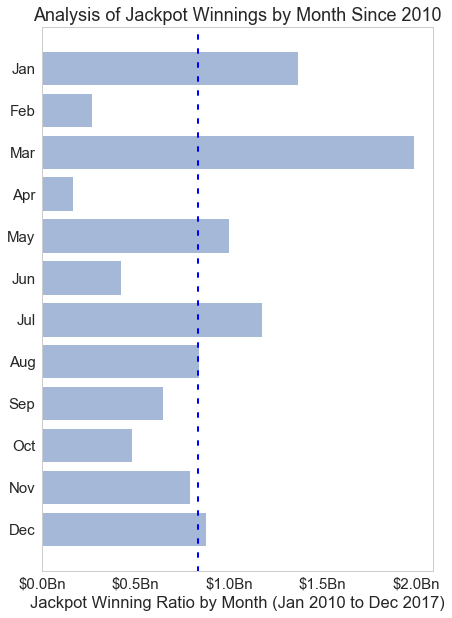

In [338]:
import matplotlib.pyplot as plt
import plotly.plotly as py


mpl_fig = plt.figure()
# --> your matplotlib methods <--

# Calculate proportion of Jackpot amounts won by Month since 2010
jackpot_amt_month_since_2010 = winner_detail_df[(winner_detail_df['year']>2009)&(winner_detail_df['year']<2018)].groupby(['month'])['j_amt_col'].agg('sum')



# Plot Jackpot Winning ratio by Month Since 2010
order_since_2010 = jackpot_amt_month_since_2010.index
fig, ax = plt.subplots(figsize=(7,10))
ax.grid(False)

plt.barh(order_since_2010, jackpot_amt_month_since_2010, align='center', alpha=0.5)
plt.yticks(order_since_2010, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Jackpot Winning Ratio by Month (Jan 2010 to Dec 2017)')
plt.title('Analysis of Jackpot Winnings by Month Since 2010')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fBn' % (x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()
ax.axvline(jackpot_amt_month_since_2010.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

plt.show()


(array([ 135.,   83.,   56.,   34.,   23.,   21.,   13.,    9.,    8.,
           6.,    4.,    4.,    3.,    0.,    0.,    2.,    0.,    0.,
           0.,    2.]),
 array([ 101.  ,  128.75,  156.5 ,  184.25,  212.  ,  239.75,  267.5 ,
         295.25,  323.  ,  350.75,  378.5 ,  406.25,  434.  ,  461.75,
         489.5 ,  517.25,  545.  ,  572.75,  600.5 ,  628.25,  656.  ]),
 <a list of 20 Patch objects>)

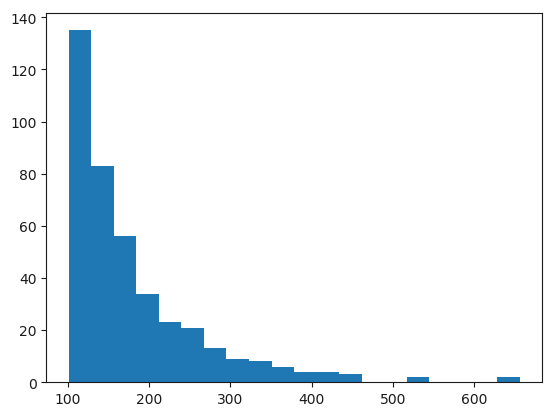

In [63]:

# histogram of lotto greater than $100 million
jack_above_100m = mega_df.jackpot_prop[mega_df.jackpot_prop>100]
date_jack_above_100m = mega_df.date_prop[mega_df.jackpot_prop>100]


plt.hist(jack_above_100m, bins=20, histtype='bar', align='mid', orientation='vertical', color=None, label=None, stacked=False, data=mega_df)





In [64]:
date_jack_above_50m.dtype

NameError: name 'date_jack_above_50m' is not defined

In [65]:
#postal = {'WA': 'WASHINGTON', 'VA': 'VIRGINIA', 'DE': 'DELAWARE', 'DC': 'DISTRICT OF COLUMBIA', 'WI': 'WISCONSIN', 'WV': 'WEST VIRGINIA', 'HI': 'HAWAII', 'FL': 'FLORIDA', 'FM': 'FEDERATED STATES OF MICRONESIA', 'WY': 'WYOMING', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'TX': 'TEXAS', 'LA': 'LOUISIANA', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'NE': 'NEBRASKA', 'TN': 'TENNESSEE', 'NY': 'NEW YORK', 'PA': 'PENNSYLVANIA', 'CA': 'CALIFORNIA', 'NV': 'NEVADA', 'PW': 'PALAU', 'GU': 'GUAM GU', 'CO': 'COLORADO', 'VI': 'VIRGIN ISLANDS', 'AK': 'ALASKA', 'AL': 'ALABAMA', 'AS': 'AMERICAN SAMOA', 'AR': 'ARKANSAS', 'VT': 'VERMONT', 'IL': 'ILLINOIS', 'GA': 'GEORGIA', 'IN': 'INDIANA', 'IA': 'IOWA', 'OK': 'OKLAHOMA', 'AZ': 'ARIZONA', 'ID': 'IDAHO', 'CT': 'CONNECTICUT', 'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'OH': 'OHIO', 'UT': 'UTAH', 'MO': 'MISSOURI', 'MN': 'MINNESOTA', 'MI': 'MICHIGAN', 'MH': 'MARSHALL ISLANDS', 'RI': 'RHODE ISLAND', 'KS': 'KANSAS', 'MT': 'MONTANA', 'MP': 'NORTHERN MARIANA ISLANDS', 'MS': 'MISSISSIPPI', 'PR': 'PUERTO RICO', 'SC': 'SOUTH CAROLINA', 'KY': 'KENTUCKY', 'OR': 'OREGON', 'SD': 'SOUTH DAKOTA'}
#postal_title = {k:v.title() for k, v in postal.items()}

In [66]:

# print(np.mean(mega_df.num1_prop), np.mean(mega_df.num2_prop), np.mean(mega_df.num3_prop), np.mean(mega_df.num4_prop), np.mean(mega_df.num5_prop))

np.mean(mega_df)

# mega_df.describe()
# mega_df.apply(lambda x: min(x), axis=0)

jackpot_prop      61.648080
num1_prop          9.543419
num2_prop         19.420018
num3_prop         29.212980
num4_prop         38.993601
num5_prop         48.834552
year            2007.360146
month              6.498629
mega_ball         18.957038
multiplier         3.555113
dtype: float64

In [ ]:
num_of_strategy_runs = 0 
cumulative_strategy_return = 0

In [346]:


# Creating arrays with 10k trials for time periods 1, 2, and 3

n = 5
mega_n = 1
num_trials = 10000
num_trials_time1 = 1713
num_trials_time2 = 420
num_trials_time3 = 55

max_num_time1 = 56
max_num_time2 = 75
max_num_time3 = 70

max_mega_time1 = 46
max_mega_time2 = 15
max_mega_time3 = 25


# trials for time period 1
trial_gen_time1 = lambda: np.random.choice(range(1,max_num_time1+1), size=n, replace=False)
trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials_time1)))
#trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials)))

mega_gen_time1 = lambda: np.random.choice(range(1,max_mega_time1+1), size=mega_n)
mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials_time1)))
#mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials)))


# trials for time period 2
trial_gen_time2 = lambda: np.random.choice(range(1,max_num_time2+1), size=n, replace=False)
trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials_time2)))
#trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials)))

mega_gen_time2 = lambda: np.random.choice(range(1,max_mega_time2+1), size=mega_n)
mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials_time2)))
#mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials)))

# trials for time period 3
trial_gen_time3 = lambda: np.random.choice(range(1,max_num_time3+1), size=n, replace=False)
trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials_time3)))
#trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials)))

mega_gen_time3 = lambda: np.random.choice(range(1,max_mega_time3+1), size=mega_n)
mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials_time3)))
#mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials)))


# formatting trials variable in ascending order as reported by lotto
trial_sort_time1 = np.sort(trial_time1, axis=1)
trial_sort_time2 = np.sort(trial_time2, axis=1)
trial_sort_time3 = np.sort(trial_time3, axis=1)

# set of the random trial drawings

trial_set = [set(x) for x in trial_time1]
lotto_strat_df = mega1_df[['date_prop','num_list_prop']]
result_set = [set(x) for x in lotto_strat_df.num_list_prop]

lotto_strat_df.insert(loc=0, column='result_set', value = result_set)
lotto_strat_df.insert(loc=1, column='trial_set', value = trial_set)
lotto_strat_df.loc[lotto_strat_df['result_set'] == lotto_strat_df['trial_set'], 'mean_status'] = True


# create bet strategy dataframe
bet_strategy_df = mega1_df[['date_prop','num1_prop','num2_prop','num3_prop','num4_prop','num5_prop',
                            'jackpot_prop','mega_ball','multiplier','mean_status']]
bet_strategy_df.set_index('date_prop', inplace=True)


# add numbers from random trial in bet strategy dataframe
bet_num1 = [x[0] for x in trial_sort_time1]
bet_num2 = [x[1] for x in trial_sort_time1]
bet_num3 = [x[2] for x in trial_sort_time1]
bet_num4 = [x[3] for x in trial_sort_time1]
bet_num5 = [x[4] for x in trial_sort_time1]
bet_mega = [x[0] for x in mega_time1]

bet_strategy_df.insert(loc=0, column='bet_num1', value = bet_num1)
bet_strategy_df.insert(loc=1, column='bet_num2', value = bet_num2)
bet_strategy_df.insert(loc=2, column='bet_num3', value = bet_num3)
bet_strategy_df.insert(loc=3, column='bet_num4', value = bet_num4)
bet_strategy_df.insert(loc=4, column='bet_num5', value = bet_num5)
bet_strategy_df.insert(loc=5, column='bet_mega', value = bet_mega)


# Add flag for when Drawing results match Random trial numbers

bet_strategy_df.loc[bet_strategy_df['bet_num1'] == bet_strategy_df['num1_prop'], 'first_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num2'] == bet_strategy_df['num2_prop'], 'second_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num3'] == bet_strategy_df['num3_prop'], 'third_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num4'] == bet_strategy_df['num4_prop'], 'fourth_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num5'] == bet_strategy_df['num5_prop'], 'fifth_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_mega'] == bet_strategy_df['mega_ball'], 'mega_num'] = 1

bet_main_columns = bet_strategy_df.iloc[:,16:21].columns
bet_mega_column = bet_strategy_df.iloc[:,21:22].columns

main_win_outcome = np.sum(bet_strategy_df[bet_main_columns], axis=1)
mega_win_outcome =  np.sum(bet_strategy_df[bet_mega_column], axis=1)
jackpot_win_outcome =  main_win_outcome + mega_win_outcome 

bet_strategy_df.insert(loc=0, column='main_win_outcome', value = main_win_outcome)
bet_strategy_df.insert(loc=1, column='mega_win_outcome', value = mega_win_outcome)
bet_strategy_df.insert(loc=2, column='jackpot_win_outcome', value = jackpot_win_outcome)


# Add formula to calculate Strategy return
strategy_cost = (len(bet_strategy_df) * -1)

bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 1, 'main_win_amount'] = 0
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 2, 'main_win_amount'] = 0
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 3, 'main_win_amount'] = 5
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 4, 'main_win_amount'] = 500
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 5, 'main_win_amount'] = 1000000
bet_strategy_df.loc[bet_strategy_df['mega_win_outcome'] == 1, 'mega_win_amount'] = 1
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 1), 'mega_win_amount'] = 2
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 2), 'mega_win_amount'] = 5
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 3), 'mega_win_amount'] = 50
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 4), 'mega_win_amount'] = 5000
bet_strategy_df.loc[bet_strategy_df['jackpot_win_outcome'] == 6,'jackpot_win_amount'] = 10000000

num_of_strategy_runs += 1
cumulative_strategy_return += np.sum(bet_strategy_df['main_win_amount']) + strategy_cost + np.sum(bet_strategy_df['mega_win_outcome'])

NameError: name 'num_of_strategy_runs' is not defined

In [ ]:
np.sum(bet_strategy_df['mega_win_outcome'])
bet_strategy_df[bet_strategy_df['main_win_outcome']>2]

In [ ]:
num_of_strategy_runs

In [ ]:
cumulative_strategy_return

In [ ]:
# Random Strategy
random_num_of_strategy_runs = 10
random_cumulative_strategy_return = -17070

In [ ]:
# Low Number Strategy
strategy_num_of_strategy_runs = 10
strategy_cumulative_strategy_return = -16595

In [ ]:
num_of_strategy_runs = 0 
cumulative_strategy_return = 0

In [ ]:


# Creating arrays with 10k trials for time periods 1, 2, and 3

n = 5
mega_n = 1
num_trials = 10000
num_trials_time1 = 1713
num_trials_time2 = 420
num_trials_time3 = 55

max_num_time1 = 56
max_num_time2 = 75
max_num_time3 = 70

max_mega_time1 = 46
max_mega_time2 = 15
max_mega_time3 = 25


# trials for time period 1
trial_gen_time1 = lambda: np.random.choice(range(1,max_num_time1+1), size=n, replace=False)
trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials_time1)))
#trial_time1 = trial_time1 - np.array([0,1,2,2,2])
#trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials)))

mega_gen_time1 = lambda: np.random.choice(range(1,max_mega_time1+1), size=mega_n)
mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials_time1)))
mega_time1 = mega_time1 - np.array([3])
#mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials)))


# trials for time period 2
trial_gen_time2 = lambda: np.random.choice(range(1,max_num_time2+1), size=n, replace=False)
trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials_time2)))
#trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials)))

mega_gen_time2 = lambda: np.random.choice(range(1,max_mega_time2+1), size=mega_n)
mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials_time2)))
#mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials)))

# trials for time period 3
trial_gen_time3 = lambda: np.random.choice(range(1,max_num_time3+1), size=n, replace=False)
trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials_time3)))
#trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials)))

mega_gen_time3 = lambda: np.random.choice(range(1,max_mega_time3+1), size=mega_n)
mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials_time3)))
#mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials)))


# formatting trials variable in ascending order as reported by lotto
trial_sort_time1 = np.sort(trial_time1, axis=1)
trial_sort_time2 = np.sort(trial_time2, axis=1)
trial_sort_time3 = np.sort(trial_time3, axis=1)

# set of the random trial drawings

trial_set = [set(x) for x in trial_time1]
lotto_strat_df = mega1_df[['date_prop','num_list_prop']]
result_set = [set(x) for x in lotto_strat_df.num_list_prop]

lotto_strat_df.insert(loc=0, column='result_set', value = result_set)
lotto_strat_df.insert(loc=1, column='trial_set', value = trial_set)
lotto_strat_df.loc[lotto_strat_df['result_set'] == lotto_strat_df['trial_set'], 'mean_status'] = True


# create bet strategy dataframe
bet_strategy_df = mega1_df[['date_prop','num1_prop','num2_prop','num3_prop','num4_prop','num5_prop',
                            'jackpot_prop','mega_ball','multiplier','mean_status']]
bet_strategy_df.set_index('date_prop', inplace=True)


# add numbers from random trial in bet strategy dataframe
bet_num1 = [x[0] for x in trial_sort_time1]
bet_num2 = [x[1] for x in trial_sort_time1]
bet_num3 = [x[2] for x in trial_sort_time1]
bet_num4 = [x[3] for x in trial_sort_time1]
bet_num5 = [x[4] for x in trial_sort_time1]
bet_mega = [x[0] for x in mega_time1]

bet_strategy_df.insert(loc=0, column='bet_num1', value = bet_num1)
bet_strategy_df.insert(loc=1, column='bet_num2', value = bet_num2)
bet_strategy_df.insert(loc=2, column='bet_num3', value = bet_num3)
bet_strategy_df.insert(loc=3, column='bet_num4', value = bet_num4)
bet_strategy_df.insert(loc=4, column='bet_num5', value = bet_num5)
bet_strategy_df.insert(loc=5, column='bet_mega', value = bet_mega)


# Add flag for when Drawing results match Random trial numbers

bet_strategy_df.loc[bet_strategy_df['bet_num1'] == bet_strategy_df['num1_prop'], 'first_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num2'] == bet_strategy_df['num2_prop'], 'second_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num3'] == bet_strategy_df['num3_prop'], 'third_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num4'] == bet_strategy_df['num4_prop'], 'fourth_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_num5'] == bet_strategy_df['num5_prop'], 'fifth_num'] = 1
bet_strategy_df.loc[bet_strategy_df['bet_mega'] == bet_strategy_df['mega_ball'], 'mega_num'] = 1

bet_main_columns = bet_strategy_df.iloc[:,16:21].columns
bet_mega_column = bet_strategy_df.iloc[:,21:22].columns

main_win_outcome = np.sum(bet_strategy_df[bet_main_columns], axis=1)
mega_win_outcome =  np.sum(bet_strategy_df[bet_mega_column], axis=1)
jackpot_win_outcome =  main_win_outcome + mega_win_outcome 

bet_strategy_df.insert(loc=0, column='main_win_outcome', value = main_win_outcome)
bet_strategy_df.insert(loc=1, column='mega_win_outcome', value = mega_win_outcome)
bet_strategy_df.insert(loc=2, column='jackpot_win_outcome', value = jackpot_win_outcome)


# Add formula to calculate Strategy return
strategy_cost = (len(bet_strategy_df) * -1)

bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 1, 'main_win_amount'] = 0
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 2, 'main_win_amount'] = 0
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 3, 'main_win_amount'] = 5
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 4, 'main_win_amount'] = 500
bet_strategy_df.loc[bet_strategy_df['main_win_outcome'] == 5, 'main_win_amount'] = 1000000
bet_strategy_df.loc[bet_strategy_df['mega_win_outcome'] == 1, 'mega_win_amount'] = 1
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 1), 'mega_win_amount'] = 2
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 2), 'mega_win_amount'] = 5
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 3), 'mega_win_amount'] = 50
bet_strategy_df.loc[(bet_strategy_df['mega_win_outcome'] == 1)&(bet_strategy_df['main_win_outcome'] == 4), 'mega_win_amount'] = 5000
bet_strategy_df.loc[bet_strategy_df['jackpot_win_outcome'] == 6,'jackpot_win_amount'] = 10000000

num_of_strategy_runs += 1
cumulative_strategy_return += np.sum(bet_strategy_df['main_win_amount']) + strategy_cost + np.sum(bet_strategy_df['mega_win_outcome'])

In [ ]:
num_of_strategy_runs

In [ ]:
cumulative_strategy_return

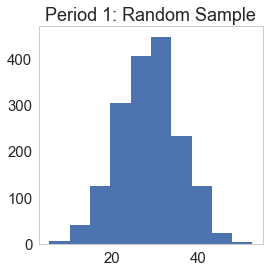

In [375]:


# MAIN DRAW - RANDOM SAMPLE
# Time period 1 random number trials
mean_trial_time1 = np.mean(trial_time1, axis=1)
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_trial_time1)
plt.title('Period 1: Random Sample')
ax.grid(False)
plt.show()

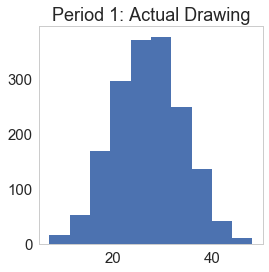

In [376]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 1 lotto results # 1713 drawings
mean_num_list_prop_time1 = [np.mean(x) for x in mega1_df.num_list_prop]
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_num_list_prop_time1)
plt.title('Period 1: Actual Drawing')
ax.grid(False)
plt.show()

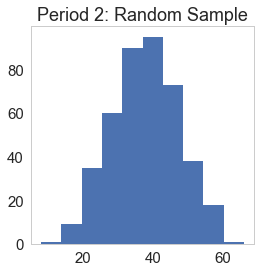

In [378]:

# MAIN DRAW - RANDOM SAMPLE
# Time period 2 random number trials
mean_trial_time2 = np.mean(trial_time2, axis=1)
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_trial_time2)
plt.title('Period 2: Random Sample')
ax.grid(False)
plt.show()

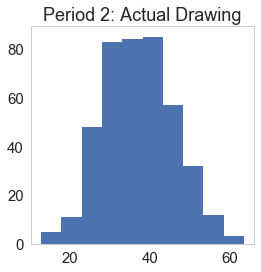

In [379]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 2 lotto results # 420 drawings
mean_num_list_prop_time2 = [np.mean(x) for x in mega2_df.num_list_prop]
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_num_list_prop_time2)
plt.title('Period 2: Actual Drawing')
ax.grid(False)
plt.show()

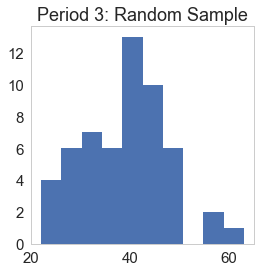

In [380]:

# MAIN DRAW - RANDOM SAMPLE
# Time period 3 random number trials
mean_trial_time3 = np.mean(trial_time3, axis=1)
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_trial_time3)
plt.title('Period 3: Random Sample')
ax.grid(False)
plt.show()

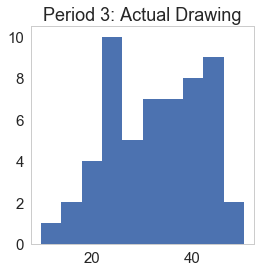

In [381]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 3 lotto results # 55 drawings
mean_num_list_prop_time3 = [np.mean(x) for x in mega3_df.num_list_prop]
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mean_num_list_prop_time3)
plt.title('Period 3: Actual Drawing')
ax.grid(False)
plt.show()

In [ ]:

# MEGA BALL - RANDOM SAMPLE
# Time period 1 random number trials for 
#n, bins, patches = plt.hist(mega_time1)
#plt.show()

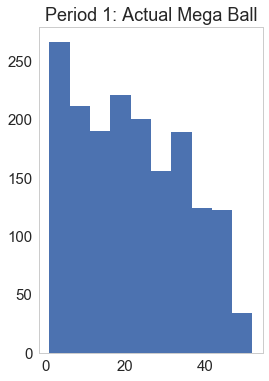

In [393]:

# MEGA BALL - ACTUAL RESULTS
# Time period 1 mega results # 1713 drawings
fig, ax = plt.subplots(figsize=(4,6))
n, bins, patches = plt.hist(mega1_df.mega_ball)
plt.title('Period 1: Actual Mega Ball')
ax.grid(False)
plt.show()

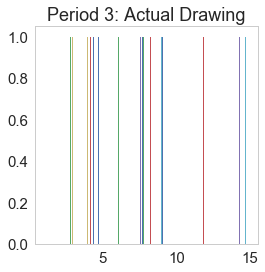

In [385]:

# MEGA BALL - RANDOM SAMPLE
# Time period 2 random number trials for 420 drawings
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mega_time2)
plt.title('Period 2: Random Mega Ball')
ax.grid(False)
plt.show()

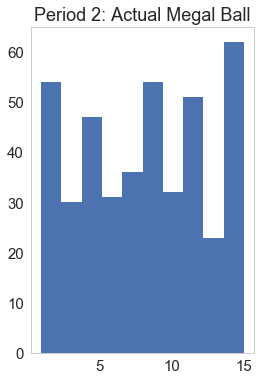

In [392]:

# MEGA BALL - ACTUAL RESULTS
# Time period 2 mega results # 420 drawings
fig, ax = plt.subplots(figsize=(4,6))
n, bins, patches = plt.hist(mega2_df.mega_ball)
plt.title('Period 2: Actual Megal Ball')
ax.grid(False)
plt.show()

In [ ]:

# MEGA BALL - RANDOM SAMPLE
# Time period 3 random number trials for 55 drawings
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = plt.hist(mega_time3)
plt.title('Period 3: Actual Drawing')
ax.grid(False)
plt.show()

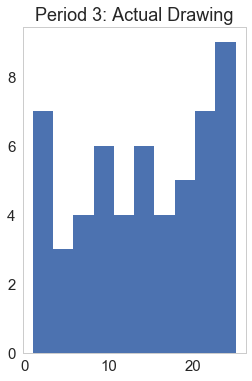

In [391]:

# MEGA BALL - ACTUAL RESULTS
# Time period 3 mega results # 55 drawings
fig, ax = plt.subplots(figsize=(4,6))
n, bins, patches = plt.hist(mega3_df.mega_ball)
plt.title('Period 3: Actual Drawing')
ax.grid(False)
plt.show()

In [ ]:

%matplotlib inline
sns.distplot(mega1_df.mega_ball, kde=False, rug=True);

[Text(0,0.5,'Frequency'), Text(0.5,0,'Mega Ball Winning Number')]

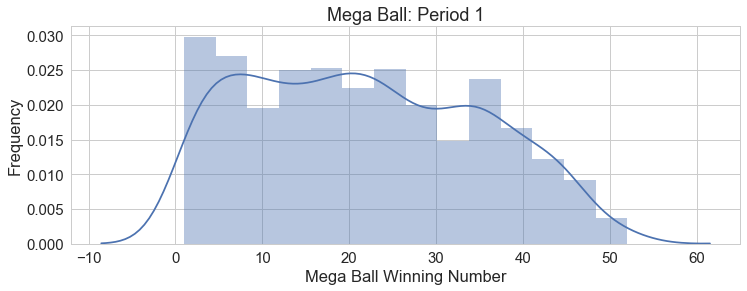

In [403]:
fig, ax = plt.subplots()
sns.distplot(mega1_df.mega_ball).set_title("Mega Ball: Period 1")
fig.set_size_inches(12, 4)
ax.set(xlabel='Mega Ball Winning Number', ylabel='Frequency')

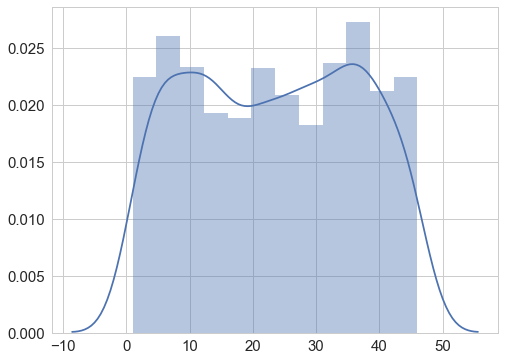

In [354]:
sns.distplot(mega_time1);

[Text(0,0.5,'Frequency'), Text(0.5,0,'Mega Ball Winning Number')]

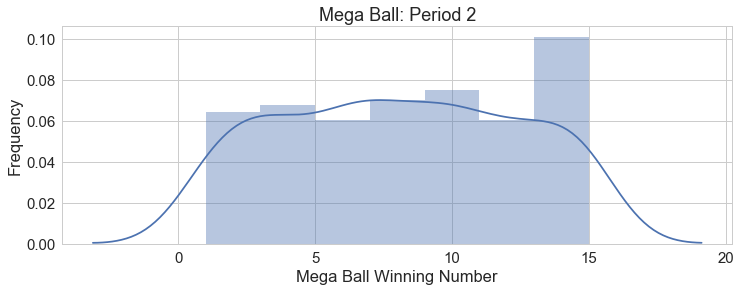

In [405]:
fig, ax = plt.subplots()
sns.distplot(mega2_df.mega_ball).set_title("Mega Ball: Period 2")
fig.set_size_inches(12, 4)
ax.set(xlabel='Mega Ball Winning Number', ylabel='Frequency')

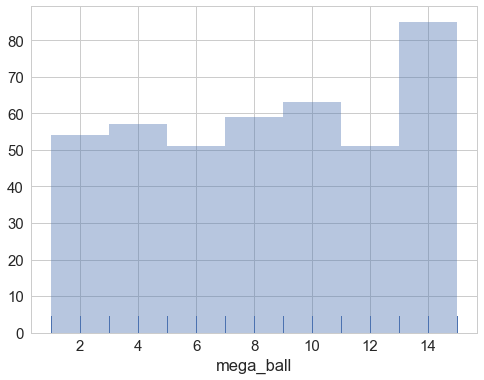

In [356]:
sns.distplot(mega2_df.mega_ball, kde=False, rug=True);

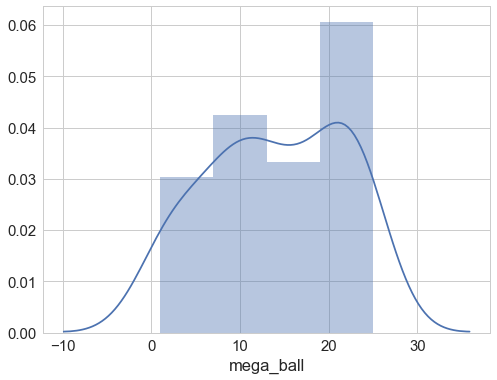

In [357]:
sns.distplot(mega3_df.mega_ball);

In [361]:
len(mean_trial_time2)

420

In [364]:
stats.ttest_ind(mean_num_list_prop_time2, mean_trial_time2)

Ttest_indResult(statistic=-1.2118100852305711, pvalue=0.22592666042145709)

In [370]:
true_mu = mean_num_list_prop_time2

onesample_results = scipy.stats.ttest_1samp(mean_trial_time2, true_mu)

matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

onesample_table = FF.create_table(matrix_onesample, index=True)
py.iplot(onesample_table, filename='onesample-table')

/Users/sanjaypamnani/anaconda3/lib/python3.6/site-packages/plotly/tools.py:1497: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Users/sanjaypamnani/anaconda3/lib/python3.6/site-packages/plotly/tools.py:1416: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [ ]:
###mega3_df.drop(columns=['num_mean','exp_mean'],axis=1, inplace=True)

In [ ]:

# Add year, month and mean columns in mega1_df
#year = mega1_df['date_prop'].dt.year
#month = mega1_df['date_prop'].dt.month
mean1 = [np.mean(x) for x in mega1_df.num_list_prop]
exp_mean1 = np.ones(len(mega1_df.date_prop)) * (28.5)

mega1_df.insert(loc=7, column='num_mean', value = mean1)
mega1_df.insert(loc=8, column='exp_mean', value = exp_mean1)
#mega1_df.insert(loc=9, column='year', value = year)
#mega1_df.insert(loc=10, column='month', value = month)

In [133]:
sd1 = [sd(x) for x in mega2_df.num_list_prop]

NameError: name 'sd' is not defined

In [ ]:

# Add year, month and mean columns in mega2_df
#year = mega2_df['date_prop'].dt.year
#month = mega2_df['date_prop'].dt.month
mean2 = [np.mean(x) for x in mega2_df.num_list_prop]
exp_mean2 = np.ones(len(mega2_df.date_prop)) * (38)

mega2_df.insert(loc=7, column='num_mean', value = mean2)
mega2_df.insert(loc=8, column='exp_mean', value = exp_mean2)
#mega2_df.insert(loc=9, column='year', value = year)
#mega2_df.insert(loc=10, column='month', value = month)

In [ ]:

# Add year, month and mean columns in mega3_df#
#year = mega3_df['date_prop'].dt.year
#month = mega3_df['date_prop'].dt.month
mean3 = [np.mean(x) for x in mega3_df.num_list_prop]
exp_mean3 = np.ones(len(mega3_df.date_prop)) * (35.5)

mega3_df.insert(loc=7, column='num_mean', value = mean3)
mega3_df.insert(loc=8, column='exp_mean', value = exp_mean3)
#mega3_df.insert(loc=9, column='year', value = year)
#mega3_df.insert(loc=10, column='month', value = month)

In [ ]:
pd.options.mode.chained_assignment = None 

# Add Above or Below mean column to the DataFrames

mega1_df.loc[mega1_df['num_mean'] > mega1_df['exp_mean'], 'mean_status'] = 'Above'
mega1_df.loc[mega1_df['num_mean'] == mega1_df['exp_mean'], 'mean_status'] = 'Same'
mega1_df.loc[mega1_df['num_mean'] < mega1_df['exp_mean'], 'mean_status'] = 'Below'


mega2_df.loc[mega2_df['num_mean'] > mega2_df['exp_mean'], 'mean_status'] = 'Above'
mega2_df.loc[mega2_df['num_mean'] == mega2_df['exp_mean'], 'mean_status'] = 'Same'
mega2_df.loc[mega2_df['num_mean'] < mega2_df['exp_mean'], 'mean_status'] = 'Below'


mega3_df.loc[mega3_df['num_mean'] > mega3_df['exp_mean'], 'mean_status'] = 'Above'
mega3_df.loc[mega3_df['num_mean'] == mega3_df['exp_mean'], 'mean_status'] = 'Same'
mega3_df.loc[mega3_df['num_mean'] < mega3_df['exp_mean'], 'mean_status'] = 'Below'


In [ ]:
#mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)


In [ ]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.boxplot(x='mean_status', y='num_mean', data=mega1_df, orient='v')


In [ ]:


sns.violinplot([mega1_df.mega_ball, mega1_df.num_mean], inner="point", orient='v')

sns.set(rc={'figure.figsize':(15,12)})

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
#mega1 = sns.load_dataset("mega1_df")

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots()
sns.violinplot(x="year", y="num_mean", hue="mean_status", data=mega1_df, split=True,
               inner="quart", palette={"Above": "b", "Below": "y"}, ax=ax)
sns.despine(left=True)
fig.set_size_inches(17, 12)
plt.xlabel("Years")
plt.ylabel("Mean Value of Winning Numbers Drawn")
plt.title("Mean Value of Winning Numbers over Time")

In [ ]:
sns.jointplot(x="num_mean", y="mega_ball", data=mega1_df, size=12);
plt.ylabel("Mega Ball")
plt.xlabel("Mean Value of Winning Numbers Drawn")
plt.title("Mega Millions: Mean Value of Results over Time")

In [184]:


# Calculate statistics on the distribution of the 3 time periods we have for Mega Millions lotto

# Calculate Mean
mega1_mean = mega1_df.num_mean.mean()
mega2_mean = mega2_df.num_mean.mean()
mega3_mean = mega3_df.num_mean.mean()

# Calculate Kurtosis
mega1_kurt = mega1_df.num_mean.kurtosis()
mega2_kurt = mega2_df.num_mean.kurtosis()
mega3_kurt = mega3_df.num_mean.kurtosis()

# Calculate Skew
mega1_skew = mega1_df.num_mean.skew()
mega2_skew = mega2_df.num_mean.skew()
mega3_skew = mega3_df.num_mean.skew()

# Calculate Standard Deviation
mega1_std = mega1_df.num_mean.std()
mega2_std = mega2_df.num_mean.std()
mega3_std = mega3_df.num_mean.std()

# Calculate Expected Mean
mega1_mean_exp = (56+1)/2
mega2_mean_exp = (75+1)/2
mega3_mean_exp = (70+1)/2

# Calculate Mean
mega1_ball_mean = mega1_df.mega_ball.mean()
mega2_ball_mean = mega2_df.mega_ball.mean()
mega3_ball_mean = mega3_df.mega_ball.mean()

# Calculate Standard Deviation
mega1_ball_std = mega1_df.mega_ball.std()
mega2_ball_std = mega2_df.mega_ball.std()
mega3_ball_std = mega3_df.mega_ball.std()

# Calculate Expected Mean
mega1_ball_mean_exp = (46+1)/2
mega2_ball_mean_exp = (15+1)/2
mega3_ball_mean_exp = (25+1)/2

# Calculate Kurtosis
mega1_ball_kurt = mega1_df.mega_ball.kurtosis()
mega2_ball_kurt = mega2_df.mega_ball.kurtosis()
mega3_ball_kurt = mega3_df.mega_ball.kurtosis()

# Calculate Skew
mega1_ball_skew = mega1_df.mega_ball.skew()
mega2_ball_skew = mega2_df.mega_ball.skew()
mega3_ball_skew = mega3_df.mega_ball.skew()

In [204]:

# Store distribution values in a dictionary and invert dictionary for graphing
# Exclude Kurtosis and Skew since they don't add much incremental information
mega_dist_dict = {'Mean': [mega1_mean,mega2_mean,mega3_mean], 
                  'Expected_mean': [mega1_mean_exp, mega2_mean_exp, mega3_mean_exp],
                 'Standard_deviation': [mega1_std,mega2_std,mega3_std]}
mega_ball_dist_dict = {'Mean': [mega1_ball_mean,mega2_ball_mean,mega3_ball_mean], 
                       'Expected_mean': [mega1_ball_mean_exp, mega2_ball_mean_exp, mega3_ball_mean_exp],
                       'Standard_deviation': [mega1_ball_std,mega2_ball_std,mega3_ball_std]}


mega_ball_dist_df = pd.DataFrame(mega_ball_dist_dict)
mega_ball_dist_df.index = ['Period1','Period2','Period3']
mega_ball_dist_df = mega_ball_dist_df.transpose()


mega_dist_df = pd.DataFrame(mega_dist_dict)
mega_dist_df.index = ['Period1','Period2','Period3']
mega_dist_df = mega_dist_df.transpose()


# 'Kurtosis': [mega1_kurt,mega2_kurt,mega3_kurt], 'Skew': [mega1_skew,mega2_skew,mega3_skew], 
# 'Kurtosis': [mega1_ball_kurt, mega2_ball_kurt, mega3_ball_kurt], 'Skew': [mega1_ball_skew, mega2_ball_skew, mega3_ball_skew], 

Text(0,0.5,'Actual Number of Jackpots Won')

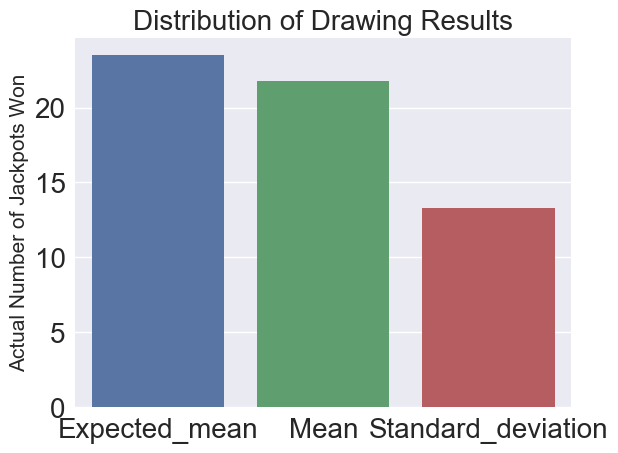

In [190]:
sns.barplot(x=mega_ball_dist_df.index, y=mega_ball_dist_df['Period1'], orient=None)
plt.title("Distribution of Drawing Results", size=20)
plt.ylabel('Actual Number of Jackpots Won', size=15)


(0, 30)

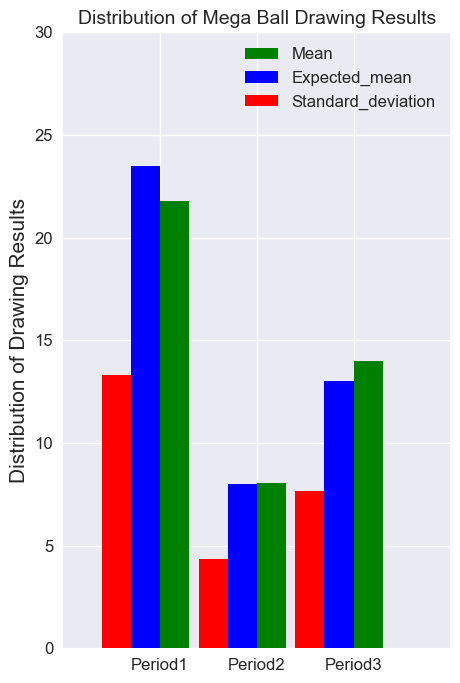

In [242]:

mega_ball_dist_df_tran = mega_ball_dist_df.transpose()


#sns.barplot(x=mega_ball_dist_df.index, y=mega_ball_dist_df.Period1, orient=None)

fig = plt.figure(figsize=(5,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .3

mega_ball_dist_df_tran.Mean.plot(kind='bar', color='green', ax=ax, width=width, position=0)
mega_ball_dist_df_tran.Expected_mean.plot(kind='bar', color='blue', ax=ax,width = width, position=1)
mega_ball_dist_df_tran.Standard_deviation.plot(kind='bar', color='red', ax=ax,width = width, position=2)

ax.grid(None, axis=1)


plt.title("Distribution of Mega Ball Drawing Results", size=14)
ax.set_ylabel('Distribution of Drawing Results', size=15)

#ax.axhline(state_win_df.WinCountbyProp.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])


ax.tick_params(labelsize=12, rotation=0)
ax.legend(loc='upper right', fontsize=12)
ax.set_xlim(-1,3)
ax.set_ylim(0,30)



(0, 50)

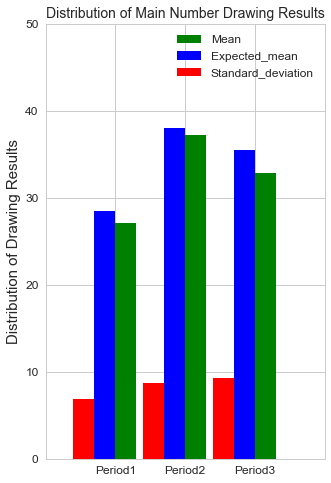

In [331]:

mega_dist_df_tran = mega_dist_df.transpose()


#sns.barplot(x=mega_ball_dist_df.index, y=mega_ball_dist_df.Period1, orient=None)

fig = plt.figure(figsize=(5,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .3

mega_dist_df_tran.Mean.plot(kind='bar', color='green', ax=ax, width=width, position=0)
mega_dist_df_tran.Expected_mean.plot(kind='bar', color='blue', ax=ax,width = width, position=1)
mega_dist_df_tran.Standard_deviation.plot(kind='bar', color='red', ax=ax,width = width, position=2)

ax.grid(None, axis=1)

plt.title("Distribution of Main Number Drawing Results", size=14)
ax.set_ylabel('Distribution of Drawing Results', size=15)

#ax.axhline(state_win_df.WinCountbyProp.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

ax.tick_params(labelsize=12, rotation=0)
ax.legend(loc='upper right', fontsize=12)
ax.set_xlim(-1,3)
ax.set_ylim(0,50)



In [ ]:

pd.options.mode.chained_assignment = None 

# Add Rolling Average to DataFrames

mega1_df['num_mean_MA10'] = mega1_df.num_mean.rolling(window=10).mean()
mega1_df['num_mean_MA25'] = mega1_df.num_mean.rolling(window=25).mean()
mega1_df['num_mean_MA50'] = mega1_df.num_mean.rolling(window=50).mean()
mega1_df['num_mean_MA100'] = mega1_df.num_mean.rolling(window=100).mean()


mega2_df['num_mean_MA10'] = mega2_df.num_mean.rolling(window=10).mean()
mega2_df['num_mean_MA25'] = mega2_df.num_mean.rolling(window=25).mean()
mega2_df['num_mean_MA50'] = mega2_df.num_mean.rolling(window=50).mean()
mega2_df['num_mean_MA100'] = mega2_df.num_mean.rolling(window=100).mean()

mega3_df['num_mean_MA10'] = mega3_df.num_mean.rolling(window=10).mean()
mega3_df['num_mean_MA25'] = mega3_df.num_mean.rolling(window=25).mean()
mega3_df['num_mean_MA50'] = mega3_df.num_mean.rolling(window=50).mean()
mega3_df['num_mean_MA100'] = mega3_df.num_mean.rolling(window=100).mean()

In [ ]:
mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)
mega2_df.to_csv("mega_time2", columns=None, header=True, index=False, index_label=None)
mega3_df.to_csv("mega_time3", columns=None, header=True, index=False, index_label=None)

In [ ]:
mega1_df

In [74]:

# Create dictionary of jackpot winners by state from winner_info_prop.csv
state_win_list = {'CA': 29, 'NY': 29, 'OH':17, 'NJ':16, 'MI':15,'MD':8,'FL':2,'IL':9,'AR':1,'TX':12,'GA':12,'MA':3,'WA':4,
                  'IN':2,'MO':1,'PA':2,'TN':1,'ID':1,'RI':1,'VA':8,'KS':1,'NC':2}
state_pop_list = [('CA',39.54),('NY',19.85),('OH',11.66),('NJ',9.1),('MI',9.96),('TX',28.3),('GA',10.43),('IL',12.8),('MD',6.05),('VA',8.47)]


In [75]:
import operator
state_win_list_sorted = sorted(state_win_list.items(), key=operator.itemgetter(1), reverse=True)


In [76]:
state_list = list(map(lambda x: x[0],state_win_list_sorted[0:10]))
state_win_count_list = list(map(lambda x: x[1],state_win_list_sorted[0:10]))
pop_list = list(map(lambda x: x[1],state_pop_list))
state_pop_prop = list(map(lambda x: x/sum(pop_list),pop_list))

In [77]:
total_state_wins = sum(state_win_count_list)
state_exp_win_by_pop = list(map(lambda x: x*total_state_wins,state_pop_prop))

In [78]:
state_exp_win_by_pop

[39.24628586065574,
 19.70254866803279,
 11.573386270491804,
 9.032402663934425,
 9.886014344262296,
 28.089779713114755,
 10.352523053278688,
 12.704918032786887,
 6.005058913934426,
 8.407082479508198]

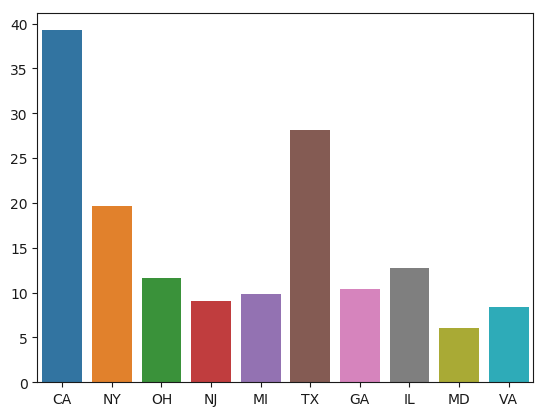

In [79]:
sns.barplot(x=state_list, y=state_exp_win_by_pop, orient=None)


In [80]:
#state_df_list = [list(x) for x in list(zip(state_list, state_win_count_list, state_exp_win_by_pop))]

In [103]:

state_win_dic = {'State': pd.Series(state_list),
                 'ActualWinCount': pd.Series(state_win_count_list),
                 'ExpectedWinCount': pd.Series(state_exp_win_by_pop)}
state_win_df = pd.DataFrame(state_win_dic)

Text(0,0.5,'Actual Number of Jackpots Won')

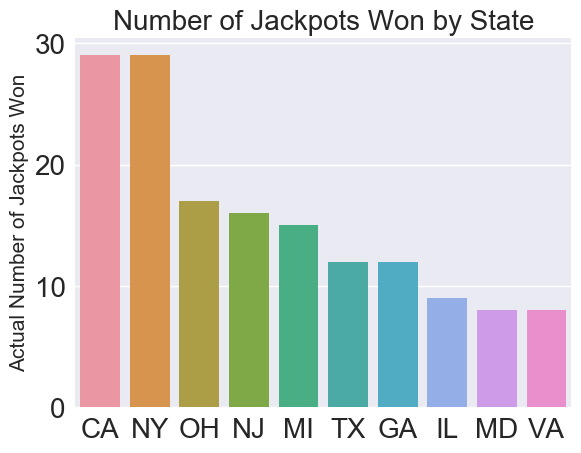

In [112]:
sns.barplot(x=state_list, y=state_win_count_list, orient=None)
plt.title("Number of Jackpots Won by State", size=20)
plt.ylabel('Actual Number of Jackpots Won', size=15)


In [105]:
state_win_df

,ActualWinCount,ExpectedWinCount,State
0,29,39.246286,CA
1,29,19.702549,NY
2,17,11.573386,OH
3,16,9.032403,NJ
4,15,9.886014,MI
5,12,28.089780,TX
6,12,10.352523,GA
7,9,12.704918,IL
8,8,6.005059,MD
9,8,8.407082,VA


(0, 45)

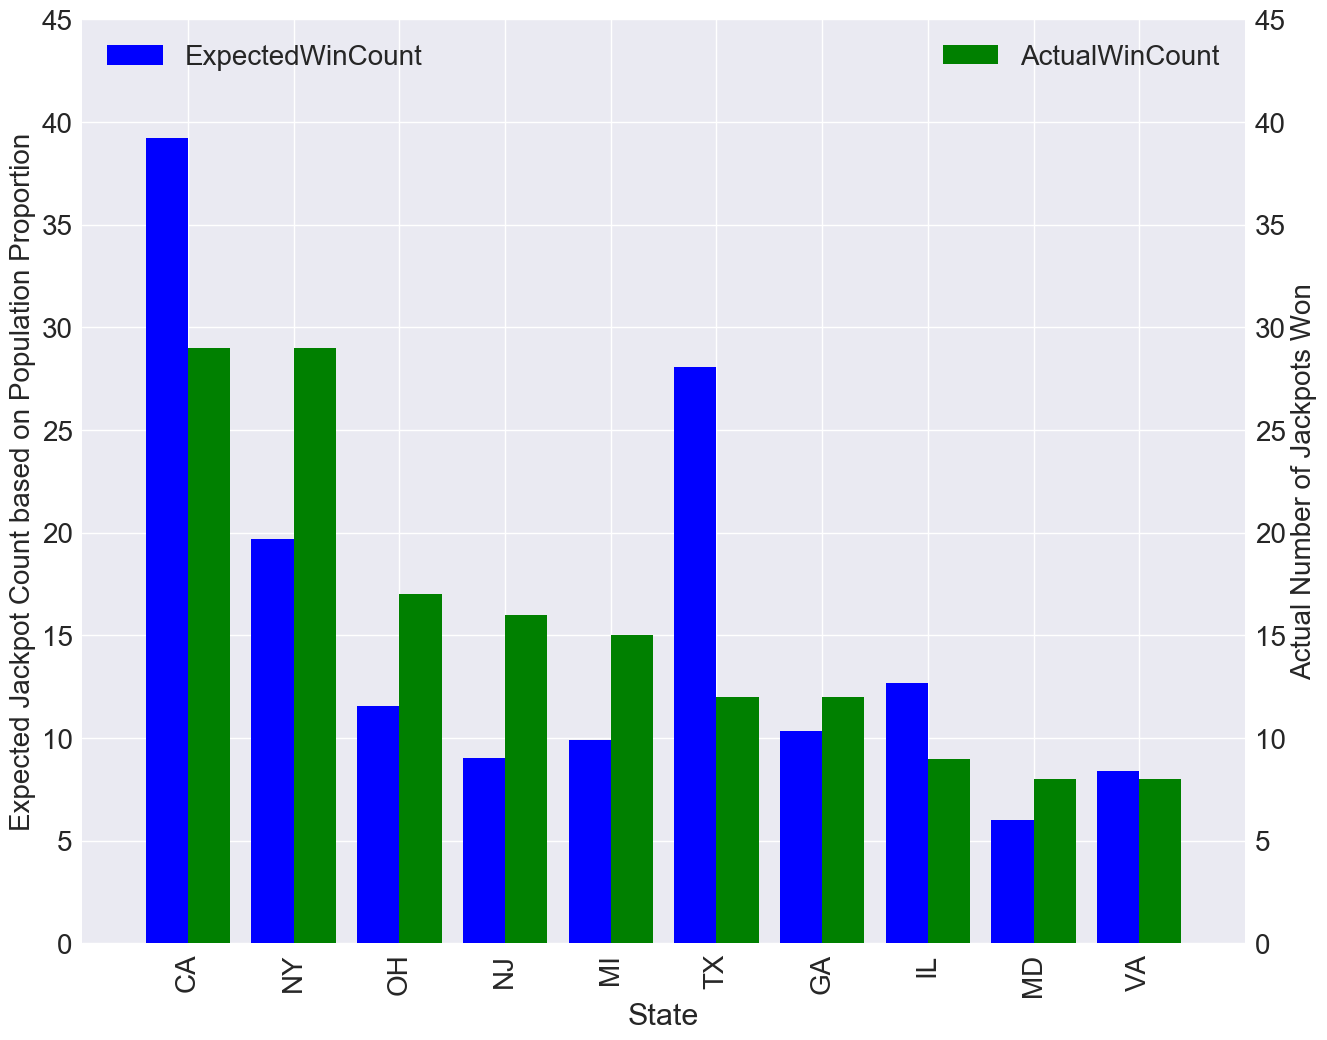

In [119]:
sns.set(font_scale=2)
sns.color_palette("hls", 8)
    
#sns.barplot(x=state_list, y=state_win_count_list, orient=None)
#sns.barplot(x=state_list, y=state_exp_win_by_pop, orient=None)

#state_win_df = state_win_df.set_index('State')

fig = plt.figure(figsize=(15,12)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .4

state_win_df.ActualWinCount.plot(kind='bar', color='green', ax=ax, width=width, position=0)
state_win_df.ExpectedWinCount.plot(kind='bar', color='blue', ax=ax2,width = width, position=1)

ax.grid(None, axis=1)
ax2.grid(None)

ax2.set_ylabel('Actual Number of Jackpots Won', size=20)
ax.set_ylabel('Expected Jackpot Count based on Population Proportion', size=20)

#ax.axhline(state_win_df.WinCountbyProp.mean(), color='blue', linewidth=2, dash_capstyle='round', dash_joinstyle='round', dashes=[2, 5])

ax.legend(loc='upper right')
ax2.legend(loc='upper left')
ax.set_xlim(-1,10)
ax.set_ylim(0,45)
ax2.set_ylim(0,45)